# This is the file whereby the data to transfermarkt is being scraped

In [ ]:
!pip install unidecode
!pip install shap
!pip3 install catboost
!pip insert
from keras.models import *
from unidecode import unidecode
import time
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn import datasets
from urllib.error import URLError
from tensorflow.keras.layers import Dense
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.xception import Xception 
import tensorflow as tf
import shap
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from shap.plots import *
import keras

ERROR: unknown command "insert" - maybe you meant "install"


In [ ]:
!pip install wandb -qqq
import wandb
# Log in to your W&B account
wandb.login()

wandb: Currently logged in as: mannyss23 (manrajnlp). Use `wandb login --relogin` to force relogin


True

# Mount the drive holding the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
dataset_path = '/content/drive/MyDrive/FYPDataset'
dataset_filename = '/footballData.csv'
dataframe_fifa = pd.read_csv(dataset_path + dataset_filename)

In [ ]:
dataframe_fifa

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2               J. Oblak                            Jan Oblak   27   
3         R. Lewandowski                   Robert Lewandowski   31   
4              Neymar Jr        Neymar da Silva Santos Júnior   28   
...                  ...                                  ...  ...   
18939          K. Angulo                         Kevin Angulo   24   
18940     Zhang Mengxuan                       Mengxuan Zhang   21   
18941      Wang Zhenghao                                  王政豪   20   
18942        Chen Zitong                          Zitong Chen   23   
18943           Song Yue                             Yue Song   28   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1993-01-07        188         87    Slovenia   
3      1988-08-21        184         80      Poland   
4      1992-02-05        175         68      Brazil   
...           ...        ...        ...         ...   
18939  1996-04-13        176         73    Colombia   
18940  1999-04-26        177         70    China PR   
18941  2000-06-28        185         74    China PR   
18942  1997-02-20        186         80    China PR   
18943  1991-11-20        185         79    China PR   

                                 club_name  ...   lwb   ldm   cdm   rdm   rwb  \
0                             FC Barcelona  ...  66+3  65+3  65+3  65+3  66+3   
1                                 Juventus  ...  65+3  61+3  61+3  61+3  65+3   
2                          Atlético Madrid  ...  32+3  36+3  36+3  36+3  32+3   
3                        FC Bayern München  ...  64+3  65+3  65+3  65+3  64+3   
4                      Paris Saint-Germain  ...  67+3  62+3  62+3  62+3  67+3   
...                                    ...  ...   ...   ...   ...   ...   ...   
18939                      América de Cali  ...  47+2  47+2  47+2  47+2  47+2   
18940  Chongqing Dangdai Lifan FC SWM Team  ...  42+2  41+2  41+2  41+2  42+2   
18941                      Tianjin TEDA FC  ...  42+2  42+2  42+2  42+2  42+2   
18942        Shijiazhuang Ever Bright F.C.  ...  47+2  49+2  49+2  49+2  47+2   
18943                      Tianjin TEDA FC  ...  47+0  47+0  47+0  47+0  47+0   

         lb   lcb    cb   rcb    rb  
0      62+3  52+3  52+3  52+3  62+3  
1      61+3  54+3  54+3  54+3  61+3  
2      32+3  33+3  33+3  33+3  32+3  
3      61+3  60+3  60+3  60+3  61+3  
4      62+3  49+3  49+3  49+3  62+3  
...     ...   ...   ...   ...   ...  
18939  47+2  46+2  46+2  46+2  47+2  
18940  45+2  47+2  47+2  47+2  45+2  
18941  44+2  47+2  47+2  47+2  44+2  
18942  47+2  49+2  49+2  49+2  47+2  
18943  47+0  46+1  46+1  46+1  47+0  

[18944 rows x 106 columns]

In [ ]:
dataframe_fifa['Index Of Player Found'] = dataframe_fifa.index

In [ ]:
dataframe_fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'Index Of Player Found'],
      dtype='object', length=107)

In [ ]:
dataframe_fifa.loc[dataframe_fifa['short_name'] == 'Pedri']

sofifa_id                                         player_url short_name  \
3059     251854  https://sofifa.com/player/251854/pedro-gonzale...      Pedri   

                 long_name  age         dob  height_cm  weight_kg nationality  \
3059  Pedro González López   17  2002-11-25        174         61       Spain   

         club_name  ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  \
3059  FC Barcelona  ...  58+2  58+2  58+2  59+2  57+2  51+2  51+2  51+2  57+2   

      Index Of Player Found  
3059                   3059  

[1 rows x 107 columns]

In [ ]:
shortNamesListFifa = dataframe_fifa['short_name'].tolist()
len(shortNamesListFifa)

18944

In [ ]:
longNamesListFifa = dataframe_fifa['long_name'].tolist()
len(longNamesListFifa)

18944

In [ ]:
def removeAccentsFromString(list_of_players):
  names_cleaned = []
  for i in range(len(list_of_players)):
    nameWithoutAccents = unidecode(list_of_players[i])
    names_cleaned.append(nameWithoutAccents)
  return names_cleaned

In [ ]:
shortNamesCleaned = removeAccentsFromString(shortNamesListFifa)
longNamesCleaned = removeAccentsFromString(longNamesListFifa)

In [ ]:
len(shortNamesCleaned)

18944

In [ ]:
len(longNamesCleaned)

18944

In [ ]:
dataframe_fifa.insert(0, "shortNamesCleaned", shortNamesCleaned)  
dataframe_fifa.insert(1, "longNamesCleaned", longNamesCleaned)

In [ ]:
dataframe_transfermarkt = pd.read_csv("/content/drive/MyDrive/footballTeamData/joinedDataframe.csv")

In [ ]:
dataframe_transfermarkt

Unnamed: 0             Players        Values
0              0  Stole Dimitrievski  1.185250e+06
1              1         Luca Zidane  9.877085e+05
2              2  Miguel Ángel Morro  5.926251e+05
3              3      Alberto García  9.877085e+04
4              5    Alejandro Catena  2.469271e+06
...          ...                 ...           ...
3456        3623        Oliver Burke  5.926251e+06
3457        3624    David McGoldrick  1.481563e+06
3458        3625     Daniel Jebbison  9.877085e+05
3459        3626         Billy Sharp  4.938543e+05
3460        3627   Antwoine Hackford  9.877085e+04

[3461 rows x 3 columns]

In [ ]:
columnsTransfermarkt = dataframe_transfermarkt.columns.tolist()

In [ ]:
dataframe_transfermarkt.drop(columns = columnsTransfermarkt[0], axis = 1, inplace = True) 

In [ ]:
dataframe_transfermarkt

Players        Values
0     Stole Dimitrievski  1.185250e+06
1            Luca Zidane  9.877085e+05
2     Miguel Ángel Morro  5.926251e+05
3         Alberto García  9.877085e+04
4       Alejandro Catena  2.469271e+06
...                  ...           ...
3456        Oliver Burke  5.926251e+06
3457    David McGoldrick  1.481563e+06
3458     Daniel Jebbison  9.877085e+05
3459         Billy Sharp  4.938543e+05
3460   Antwoine Hackford  9.877085e+04

[3461 rows x 2 columns]

In [ ]:
name_list = dataframe_transfermarkt["Players"].tolist()

In [ ]:
print(name_list)

['Stole Dimitrievski', 'Luca Zidane', 'Miguel Ángel Morro', 'Alberto García', 'Alejandro Catena', 'Emiliano Velázquez', 'Esteban Saveljich', 'Abdoulaye Ba', 'Iván Martos', 'Martín Pascual', 'Mario Suárez', 'Fran García', 'Luis Advíncula', 'Mario Hernández', 'Santi Comesaña', 'Óscar Valentín', 'José Pozo', 'Óscar Trejo', 'Joni Montiel', 'Álvaro García', 'Bebé', 'Isi Palazón', 'Lass Bangoura', 'Andrés Martín', 'Antoñín', 'Yacine Qasmi', 'Miguel Ángel Guerrero', 'Sergio Moreno', 'Sergio Benito', 'Leonardo Ulloa', 'Jan Oblak', 'Ivo Grbic', 'Miguel San Román', 'José María Giménez', 'Mario Hermoso', 'Stefan Savic', 'Felipe', 'Nehuén Pérez', 'Álvaro García', 'Renan Lodi', 'Manu Sánchez', 'Adrián Corral', 'Kieran Trippier', 'Sime Vrsaljko', 'Ricard Sánchez', 'Thomas Partey', 'Lucas Torreira', 'Geoffrey Kondogbia', 'Marcos Llorente', 'Koke', 'Saúl Ñíguez', 'Héctor Herrera', 'Juan Manuel Sanabria', 'Toni Moya', 'Josep Calavera', 'Óscar Castro', 'Thomas Lemar', 'Mario Soriano', 'Yannick Carrasco'

In [ ]:
cleanedTransfermarkt = removeAccentsFromString(name_list)

In [ ]:
print(cleanedTransfermarkt[0])

Stole Dimitrievski


In [ ]:
def indexOfPlayersInBothDataframesTransfermarktValue(playersName):
  listOfTheIndexOfPlayersInBoth = []
  playersThatCannotBeFound = []
  moreThanOneIndexForPlayer = []
  playerNameFound = []
  for i in range(len(playersName)):
    playerIndex = dataframe_fifa.loc[(dataframe_fifa['shortNamesCleaned'] == playersName[i]) | (dataframe_fifa['longNamesCleaned'] == playersName[i])].index
    if(playerIndex.size > 1):
      moreThanOneIndexForPlayer.append(playerIndex)
      continue
    if(playerIndex.size == 0):
      playersThatCannotBeFound.append(playersName[i])
    else:
      listOfTheIndexOfPlayersInBoth.append(playerIndex[0])
      playerNameFound.append(playersName[i])

  return listOfTheIndexOfPlayersInBoth, playersThatCannotBeFound, playerNameFound

  


In [ ]:
playersFound = indexOfPlayersInBothDataframesTransfermarktValue(cleanedTransfermarkt)[0]

In [ ]:
playersNotFoundList = indexOfPlayersInBothDataframesTransfermarktValue(cleanedTransfermarkt)[1]

In [ ]:
playerNameFound = indexOfPlayersInBothDataframesTransfermarktValue(cleanedTransfermarkt)[2]

In [ ]:
len(playersFound) #3461 is the total number of players in the dataset

2254

In [ ]:
playersFoundDF = pd.DataFrame()

In [ ]:
playersFoundDF.insert(0, 'Player Names Found', playerNameFound)

In [ ]:
playersFoundDF.insert(1, 'Index Of Player Found', playersFound)

In [ ]:
print(playersFound) #players found is here 

[3979, 9349, 5576, 2285, 12065, 4685, 5723, 9683, 3701, 3441, 8464, 6425, 10489, 10847, 11954, 2, 5544, 411, 3701, 282, 4543, 184, 483, 576, 227, 96, 288, 646, 272, 287, 449, 6492, 12, 1503, 48, 372, 14, 479, 148, 485, 6759, 17, 24, 38, 141, 133, 25, 220, 504, 15, 389, 1219, 6391, 7, 257, 57, 524, 3141, 42, 67, 3059, 84, 1499, 197, 6458, 1177, 142, 45, 263, 9688, 4215, 517, 163, 997, 1631, 1265, 14023, 9080, 121, 1123, 571, 559, 936, 241, 9572, 959, 350, 731, 462, 1199, 396, 1573, 1278, 1260, 5445, 2519, 445, 3122, 3241, 10780, 53, 202, 400, 511, 472, 1199, 14075, 4730, 1427, 15118, 574, 616, 1017, 1307, 484, 167, 10994, 845, 1916, 7571, 590, 245, 225, 12951, 696, 240, 1130, 639, 469, 486, 458, 807, 860, 13211, 1008, 10795, 2585, 205, 309, 9593, 1213, 6526, 1732, 15494, 2116, 3954, 4563, 15090, 17094, 3264, 13930, 833, 935, 1548, 16195, 769, 12206, 1434, 1535, 3163, 1256, 129, 377, 719, 423, 182, 955, 9604, 1237, 7480, 4628, 10826, 645, 303, 6866, 542, 740, 14794, 1254, 2509, 1941, 810

In [ ]:
print(playersNotFoundList)

['Luca Zidane', 'Miguel Angel Morro', 'Alberto Garcia', 'Alejandro Catena', 'Emiliano Velazquez', 'Esteban Saveljich', 'Martin Pascual', 'Luis Advincula', 'Jose Pozo', 'Oscar Trejo', 'Isi Palazon', 'Lass Bangoura', 'Miguel Angel Guerrero', 'Leonardo Ulloa', 'Miguel San Roman', 'Jose Maria Gimenez', 'Nehuen Perez', 'Adrian Corral', 'Ricard Sanchez', 'Thomas Partey', 'Lucas Torreira', 'Saul Niguez', 'Hector Herrera', 'Juan Manuel Sanabria', 'Toni Moya', 'Josep Calavera', 'Oscar Castro', 'Mario Soriano', 'Yannick Carrasco', 'Victor Mollejo', 'German Valera', 'Angel Correa', 'Luis Suarez', 'Sergio Camello', 'Diego Altube', 'Luis Lopez', 'Victor Chust', 'Pablo Ramon', 'Miguel Gutierrez', 'Daniel Carvajal', 'Alvaro Odriozola', 'Antonio Blanco', 'Federico Valverde', 'Vinicius Junior', 'Sergio Arribas', 'Marvin Park', 'Mariano Diaz', 'Inaki Pena', 'Arnau Tenas', 'Ronald Araujo', 'Clement Lenglet', 'Oscar Mingueza', 'Gerard Pique', 'Samuel Umtiti', 'Santi Ramos Mingo', 'Sergino Dest', 'Ilaix Mo

In [ ]:
dataframe_fifa.loc[(dataframe_fifa['shortNamesCleaned'] == 'Alvaro Negredo')]

Empty DataFrame
Columns: [shortNamesCleaned, longNamesCleaned, sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club_name, league_name, league_rank, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, ...]
Index: []

[0 rows x 109 columns]

In [ ]:
def checkForPlayersUsingContains(list_of_players): 
  indexOfPlayers = []
  moreThanOneIndexForPlayer = []
  playersThatCannotBeFound = []
  playerNameFound = []
  for i in range(len(list_of_players)):
    playerIndex = dataframe_fifa.loc[dataframe_fifa['longNamesCleaned'].str.contains(list_of_players[i], case=False) | dataframe_fifa['shortNamesCleaned'].str.contains(list_of_players[i], case=False)].index
    if(playerIndex.size > 1):
      moreThanOneIndexForPlayer.append(playerIndex)
      continue
    if(playerIndex.size == 0):
      playersThatCannotBeFound.append(list_of_players[i])
    else:
      indexOfPlayers.append(playerIndex[0])
      playerNameFound.append(list_of_players[i])

  return indexOfPlayers, playersThatCannotBeFound, moreThanOneIndexForPlayer, playerNameFound

In [ ]:
playersRemaining = checkForPlayersUsingContains(playersNotFoundList)

In [ ]:
len(playersNotFoundList)

1150

In [ ]:
playersFoundDFSecondTime = pd.DataFrame()

In [ ]:
playersFoundDFSecondTime.insert(0, 'Player Names Found', playersRemaining[3])
playersFoundDFSecondTime.insert(1, 'Index Of Player Found', playersRemaining[0])

In [ ]:
print(playersRemaining[0]) #all the players index here 

[14823, 3496, 6614, 10810, 3571, 4990, 8600, 109, 1522, 9676, 292, 112, 17403, 9580, 5424, 9581, 11895, 5452, 60, 562, 12976, 1020, 52, 2073, 189, 1421, 468, 4551, 1507, 529, 783, 7520, 534, 16413, 3935, 668, 12030, 464, 375, 5675, 101, 2518, 1694, 477, 4556, 1102, 1683, 798, 253, 3078, 2086, 1734, 1612, 630, 13204, 13956, 3400, 2224, 827, 9787, 410, 2336, 356, 819, 2246, 6411, 1723, 9715, 190, 929, 3087, 3887, 7596, 7240, 1216, 1522, 1115, 1065, 1348, 1077, 3260, 14922, 1084, 2520, 5074, 2486, 4931, 4484, 6888, 1346, 1019, 5414, 2062, 10923, 193, 1975, 1452, 4598, 1070, 1138, 666, 275, 917, 3595, 2073, 5424, 1901, 670, 230, 3184, 832, 1626, 929, 3807, 3388, 15104, 1737, 4022, 2297, 2929, 8501, 2624, 1850, 5778, 3643, 1927, 4551, 8711, 44, 4, 6, 9594, 848, 1603, 7314, 3910, 1315, 926, 15466, 513, 12003, 961, 7526, 649, 2540, 3838, 2157, 10952, 10984, 3869, 2434, 6528, 3035, 8641, 2894, 1250, 1932, 1515, 3954, 9594, 2710, 11952, 18489, 4764, 10025, 7341, 3849, 1682, 14093, 4399, 1564, 1

In [ ]:
print(len(playersRemaining[0]))

261


In [ ]:
print(playersRemaining[1])

['Luca Zidane', 'Emiliano Velazquez', 'Esteban Saveljich', 'Luis Advincula', 'Jose Pozo', 'Oscar Trejo', 'Isi Palazon', 'Lass Bangoura', 'Adrian Corral', 'Thomas Partey', 'Toni Moya', 'Josep Calavera', 'Oscar Castro', 'Mario Soriano', 'Yannick Carrasco', 'Angel Correa', 'Luis Suarez', 'Sergio Camello', 'Victor Chust', 'Pablo Ramon', 'Miguel Gutierrez', 'Antonio Blanco', 'Federico Valverde', 'Vinicius Junior', 'Marvin Park', 'Inaki Pena', 'Arnau Tenas', 'Ronald Araujo', 'Clement Lenglet', 'Oscar Mingueza', 'Samuel Umtiti', 'Santi Ramos Mingo', 'Sergino Dest', 'Ilaix Moriba', 'Konrad de la Fuente', 'Lionel Messi', 'Francisco Trincao', 'Alex Collado', 'Alfonso Pastor', 'Kike Rios', 'Marcos Acuna', 'Franco Vazquez', 'Carlos Alvarez', 'Lucas Ocampos', 'Juanlu Sanchez', 'Antonio Zarzana', 'Papu Gomez', 'Ivan Romero', 'Gaizka Ayesa', 'Urko Gonzalez', 'Jon Pacheco', 'Jeremy Blasco', 'Benat Turrientes', 'Robert Navarro', 'Claudio Bravo', 'Dani Rebollo', 'Geovanni Barba', 'Jose Calderon', 'Emers

In [ ]:
print(len(playersRemaining[1]))

875


In [ ]:
listOfPlayersRemaining = playersRemaining[1]

In [ ]:
playerNameFoundv2 = playersRemaining[3]

In [ ]:
def splitPlayerNames(list_of_players):
  listOfNames = []
  for i in range(len(list_of_players)):
    splitNames = list_of_players[i].split(" ")
    for j in range(len(splitNames)):
      listOfNames.append(splitNames[j])
  return listOfNames

In [ ]:
def checkForPlayerNamesWhichAreSplitUsingContains(list_of_players): 
  indexOfPlayers = []
  playersThatCannotBeFound = []
  moreThanOneIndexForPlayer = []
  playerNameFound = []
  j = 1
  for i in range(0,len(list_of_players),2):
    playerIndex = dataframe_fifa.loc[dataframe_fifa['longNamesCleaned'].str.contains(list_of_players[i], case=False) & dataframe_fifa['longNamesCleaned'].str.contains(list_of_players[j], case=False)].index
    if(playerIndex.size > 1):
      moreThanOneIndexForPlayer.append(playerIndex)
      j +=2
      continue
    if(playerIndex.size == 0):
      playersThatCannotBeFound.append(list_of_players[i])
      playersThatCannotBeFound.append(list_of_players[j])
    else:
      indexOfPlayers.append(playerIndex[0])
      playerNameFound.append(list_of_players[i] + " " + list_of_players[j])
     

    j +=2

  return indexOfPlayers, playersThatCannotBeFound, moreThanOneIndexForPlayer, playerNameFound

In [ ]:
splitPlayerNames = splitPlayerNames(listOfPlayersRemaining)

In [ ]:
print(splitPlayerNames)

['Luca', 'Zidane', 'Emiliano', 'Velazquez', 'Esteban', 'Saveljich', 'Luis', 'Advincula', 'Jose', 'Pozo', 'Oscar', 'Trejo', 'Isi', 'Palazon', 'Lass', 'Bangoura', 'Adrian', 'Corral', 'Thomas', 'Partey', 'Toni', 'Moya', 'Josep', 'Calavera', 'Oscar', 'Castro', 'Mario', 'Soriano', 'Yannick', 'Carrasco', 'Angel', 'Correa', 'Luis', 'Suarez', 'Sergio', 'Camello', 'Victor', 'Chust', 'Pablo', 'Ramon', 'Miguel', 'Gutierrez', 'Antonio', 'Blanco', 'Federico', 'Valverde', 'Vinicius', 'Junior', 'Marvin', 'Park', 'Inaki', 'Pena', 'Arnau', 'Tenas', 'Ronald', 'Araujo', 'Clement', 'Lenglet', 'Oscar', 'Mingueza', 'Samuel', 'Umtiti', 'Santi', 'Ramos', 'Mingo', 'Sergino', 'Dest', 'Ilaix', 'Moriba', 'Konrad', 'de', 'la', 'Fuente', 'Lionel', 'Messi', 'Francisco', 'Trincao', 'Alex', 'Collado', 'Alfonso', 'Pastor', 'Kike', 'Rios', 'Marcos', 'Acuna', 'Franco', 'Vazquez', 'Carlos', 'Alvarez', 'Lucas', 'Ocampos', 'Juanlu', 'Sanchez', 'Antonio', 'Zarzana', 'Papu', 'Gomez', 'Ivan', 'Romero', 'Gaizka', 'Ayesa', 'Urko

In [ ]:
playersFoundUsingAndCondition = checkForPlayerNamesWhichAreSplitUsingContains(splitPlayerNames)

In [ ]:
playerNameFoundv3 = playersFoundUsingAndCondition[3]

In [ ]:
playersFoundDFThirdTime = pd.DataFrame()
playersFoundDFThirdTime.insert(0, 'Player Names Found', playerNameFoundv3)
playersFoundDFThirdTime.insert(1, 'Index Of Player Found', playersFoundUsingAndCondition[0])

In [ ]:
print(len(playersFoundUsingAndCondition[0]))

158


In [ ]:
print(len(playersFoundUsingAndCondition[1]))

1428


In [ ]:
playersFoundUsingAndCondition[1][2]

'Isi'

In [ ]:
playersFoundUsingAndCondition[1][3]

'Palazon'

In [ ]:
#Emiliano Velazquez
dataframe_fifa.loc[dataframe_fifa['longNamesCleaned'].str.contains(playersFoundUsingAndCondition[1][2], case=False) & dataframe_fifa['longNamesCleaned'].str.contains(playersFoundUsingAndCondition[1][3], case=False) ]

Empty DataFrame
Columns: [shortNamesCleaned, longNamesCleaned, sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club_name, league_name, league_rank, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, ...]
Index: []

[0 rows x 109 columns]

In [ ]:
playersFoundDF

Player Names Found  Index Of Player Found
0     Stole Dimitrievski                   3979
1           Abdoulaye Ba                   9349
2            Ivan Martos                   5576
3           Mario Suarez                   2285
4        Mario Hernandez                  12065
...                  ...                    ...
2249     Oliver McBurnie                   1639
2250         Lys Mousset                   2156
2251        Oliver Burke                   7661
2252    David McGoldrick                   2300
2253         Billy Sharp                   2771

[2254 rows x 2 columns]

In [ ]:
playersFoundDFSecondTime

Player Names Found  Index Of Player Found
0       Miguel Angel Morro                  14823
1           Alberto Garcia                   3496
2         Alejandro Catena                   6614
3           Martin Pascual                  10810
4    Miguel Angel Guerrero                   3571
..                     ...                    ...
256         Vicente Guaita                    461
257        Michy Batshuayi                    745
258      Christian Benteke                   3488
259       Tosin Adarabioyo                   4545
260       Steven Sessegnon                   9576

[261 rows x 2 columns]

In [ ]:
playersFoundDFThirdTime

Player Names Found  Index Of Player Found
0    Emiliano Velazquez                   3962
1     Esteban Saveljich                   6867
2        Luis Advincula                   2397
3           Oscar Trejo                   4195
4         Thomas Partey                    117
..                  ...                    ...
153     Romaine Sawyers                   2869
154        Karlan Grant                   2525
155      Kenneth Zohore                   4845
156     Wes Foderingham                   4291
157        Luke Freeman                   3444

[158 rows x 2 columns]

In [ ]:
nameDf = pd.concat([playersFoundDF , playersFoundDFSecondTime , playersFoundDFThirdTime])

In [ ]:
nameDf

Player Names Found  Index Of Player Found
0    Stole Dimitrievski                   3979
1          Abdoulaye Ba                   9349
2           Ivan Martos                   5576
3          Mario Suarez                   2285
4       Mario Hernandez                  12065
..                  ...                    ...
153     Romaine Sawyers                   2869
154        Karlan Grant                   2525
155      Kenneth Zohore                   4845
156     Wes Foderingham                   4291
157        Luke Freeman                   3444

[2673 rows x 2 columns]

# using all the methods to get the player indexes of the players found in transfermarkt

In [ ]:
playersFound #3461 is the total number of players in the dataset

[3979,
 9349,
 5576,
 2285,
 12065,
 4685,
 5723,
 9683,
 3701,
 3441,
 8464,
 6425,
 10489,
 10847,
 11954,
 2,
 5544,
 411,
 3701,
 282,
 4543,
 184,
 483,
 576,
 227,
 96,
 288,
 646,
 272,
 287,
 449,
 6492,
 12,
 1503,
 48,
 372,
 14,
 479,
 148,
 485,
 6759,
 17,
 24,
 38,
 141,
 133,
 25,
 220,
 504,
 15,
 389,
 1219,
 6391,
 7,
 257,
 57,
 524,
 3141,
 42,
 67,
 3059,
 84,
 1499,
 197,
 6458,
 1177,
 142,
 45,
 263,
 9688,
 4215,
 517,
 163,
 997,
 1631,
 1265,
 14023,
 9080,
 121,
 1123,
 571,
 559,
 936,
 241,
 9572,
 959,
 350,
 731,
 462,
 1199,
 396,
 1573,
 1278,
 1260,
 5445,
 2519,
 445,
 3122,
 3241,
 10780,
 53,
 202,
 400,
 511,
 472,
 1199,
 14075,
 4730,
 1427,
 15118,
 574,
 616,
 1017,
 1307,
 484,
 167,
 10994,
 845,
 1916,
 7571,
 590,
 245,
 225,
 12951,
 696,
 240,
 1130,
 639,
 469,
 486,
 458,
 807,
 860,
 13211,
 1008,
 10795,
 2585,
 205,
 309,
 9593,
 1213,
 6526,
 1732,
 15494,
 2116,
 3954,
 4563,
 15090,
 17094,
 3264,
 13930,
 833,
 935,
 1548,
 1619

In [ ]:
len(playersFound)

2254

In [ ]:
len(playersRemaining[0])

261

In [ ]:
len(playersFoundUsingAndCondition[0])

158

In [ ]:
arrayOfAllIndexes =np.concatenate((playersFound, playersRemaining[0], playersFoundUsingAndCondition[0]), axis=None)

In [ ]:
arrayOfAllIndexes = arrayOfAllIndexes.tolist()

In [ ]:
len(arrayOfAllIndexes)

2673

In [ ]:
arrayOfAllIndexes

[3979,
 9349,
 5576,
 2285,
 12065,
 4685,
 5723,
 9683,
 3701,
 3441,
 8464,
 6425,
 10489,
 10847,
 11954,
 2,
 5544,
 411,
 3701,
 282,
 4543,
 184,
 483,
 576,
 227,
 96,
 288,
 646,
 272,
 287,
 449,
 6492,
 12,
 1503,
 48,
 372,
 14,
 479,
 148,
 485,
 6759,
 17,
 24,
 38,
 141,
 133,
 25,
 220,
 504,
 15,
 389,
 1219,
 6391,
 7,
 257,
 57,
 524,
 3141,
 42,
 67,
 3059,
 84,
 1499,
 197,
 6458,
 1177,
 142,
 45,
 263,
 9688,
 4215,
 517,
 163,
 997,
 1631,
 1265,
 14023,
 9080,
 121,
 1123,
 571,
 559,
 936,
 241,
 9572,
 959,
 350,
 731,
 462,
 1199,
 396,
 1573,
 1278,
 1260,
 5445,
 2519,
 445,
 3122,
 3241,
 10780,
 53,
 202,
 400,
 511,
 472,
 1199,
 14075,
 4730,
 1427,
 15118,
 574,
 616,
 1017,
 1307,
 484,
 167,
 10994,
 845,
 1916,
 7571,
 590,
 245,
 225,
 12951,
 696,
 240,
 1130,
 639,
 469,
 486,
 458,
 807,
 860,
 13211,
 1008,
 10795,
 2585,
 205,
 309,
 9593,
 1213,
 6526,
 1732,
 15494,
 2116,
 3954,
 4563,
 15090,
 17094,
 3264,
 13930,
 833,
 935,
 1548,
 1619

# All the player names and the indexes of the players that are both in the transfermarkt and the fifa dataset  



In [ ]:
playerNamesFoundInBothDataset = np.concatenate((playerNameFound, playerNameFoundv2, playerNameFoundv3), axis=None)

In [ ]:
playerNamesFoundInBothDataset = playerNamesFoundInBothDataset.tolist()

In [ ]:
playerNamesFoundInBothDataset

['Stole Dimitrievski',
 'Abdoulaye Ba',
 'Ivan Martos',
 'Mario Suarez',
 'Mario Hernandez',
 'Santi Comesana',
 'Oscar Valentin',
 'Joni Montiel',
 'Alvaro Garcia',
 'Bebe',
 'Andres Martin',
 'Antonin',
 'Yacine Qasmi',
 'Sergio Moreno',
 'Sergio Benito',
 'Jan Oblak',
 'Ivo Grbic',
 'Mario Hermoso',
 'Alvaro Garcia',
 'Renan Lodi',
 'Manu Sanchez',
 'Kieran Trippier',
 'Sime Vrsaljko',
 'Geoffrey Kondogbia',
 'Marcos Llorente',
 'Koke',
 'Thomas Lemar',
 'Vitolo',
 'Joao Felix',
 'Moussa Dembele',
 'Diego Costa',
 'Ivan Saponjic',
 'Thibaut Courtois',
 'Andriy Lunin',
 'Raphael Varane',
 'Eder Militao',
 'Sergio Ramos',
 'Nacho Fernandez',
 'Ferland Mendy',
 'Lucas Vazquez',
 'Sergio Santos',
 'Casemiro',
 'Toni Kroos',
 'Luka Modric',
 'Martin Odegaard',
 'Isco',
 'Eden Hazard',
 'Marco Asensio',
 'Rodrygo',
 'Karim Benzema',
 'Luka Jovic',
 'Borja Mayoral',
 'Hugo Duro',
 'Marc-Andre ter Stegen',
 'Neto',
 'Jordi Alba',
 'Junior Firpo',
 'Moussa Wague',
 'Sergio Busquets',
 'Frenk

In [ ]:
'Thomas Partey' in playerNamesFoundInBothDataset

True

In [ ]:
from pandas import DataFrame
dfPlayersNamesFound = DataFrame(playerNamesFoundInBothDataset,columns=['Player Names'])

In [ ]:
dfPlayersNamesFound

Player Names
0     Stole Dimitrievski
1           Abdoulaye Ba
2            Ivan Martos
3           Mario Suarez
4        Mario Hernandez
...                  ...
2668     Romaine Sawyers
2669        Karlan Grant
2670      Kenneth Zohore
2671     Wes Foderingham
2672        Luke Freeman

[2673 rows x 1 columns]

In [ ]:
dataframe_transfermarkt

Players        Values
0     Stole Dimitrievski  1.185250e+06
1            Luca Zidane  9.877085e+05
2     Miguel Ángel Morro  5.926251e+05
3         Alberto García  9.877085e+04
4       Alejandro Catena  2.469271e+06
...                  ...           ...
3456        Oliver Burke  5.926251e+06
3457    David McGoldrick  1.481563e+06
3458     Daniel Jebbison  9.877085e+05
3459         Billy Sharp  4.938543e+05
3460   Antwoine Hackford  9.877085e+04

[3461 rows x 2 columns]

In [ ]:
playersDFList = dataframe_transfermarkt['Players'].tolist()

In [ ]:
namesRemovedWithAccentsForFinalDF = removeAccentsFromString(playersDFList)

In [ ]:
dataframe_transfermarkt.insert(1, "Player Names", namesRemovedWithAccentsForFinalDF)

In [ ]:
dataframe_transfermarkt

Players        Player Names        Values
0     Stole Dimitrievski  Stole Dimitrievski  1.185250e+06
1            Luca Zidane         Luca Zidane  9.877085e+05
2     Miguel Ángel Morro  Miguel Angel Morro  5.926251e+05
3         Alberto García      Alberto Garcia  9.877085e+04
4       Alejandro Catena    Alejandro Catena  2.469271e+06
...                  ...                 ...           ...
3456        Oliver Burke        Oliver Burke  5.926251e+06
3457    David McGoldrick    David McGoldrick  1.481563e+06
3458     Daniel Jebbison     Daniel Jebbison  9.877085e+05
3459         Billy Sharp         Billy Sharp  4.938543e+05
3460   Antwoine Hackford   Antwoine Hackford  9.877085e+04

[3461 rows x 3 columns]

In [ ]:
dataframe_transfermarkt.drop(['Players'], axis = 1, inplace = True) 

In [ ]:
dataframe_transfermarkt

Player Names        Values
0     Stole Dimitrievski  1.185250e+06
1            Luca Zidane  9.877085e+05
2     Miguel Angel Morro  5.926251e+05
3         Alberto Garcia  9.877085e+04
4       Alejandro Catena  2.469271e+06
...                  ...           ...
3456        Oliver Burke  5.926251e+06
3457    David McGoldrick  1.481563e+06
3458     Daniel Jebbison  9.877085e+05
3459         Billy Sharp  4.938543e+05
3460   Antwoine Hackford  9.877085e+04

[3461 rows x 2 columns]

In [ ]:
nameDf

Player Names Found  Index Of Player Found
0    Stole Dimitrievski                   3979
1          Abdoulaye Ba                   9349
2           Ivan Martos                   5576
3          Mario Suarez                   2285
4       Mario Hernandez                  12065
..                  ...                    ...
153     Romaine Sawyers                   2869
154        Karlan Grant                   2525
155      Kenneth Zohore                   4845
156     Wes Foderingham                   4291
157        Luke Freeman                   3444

[2673 rows x 2 columns]

In [ ]:
sortedNameDF = nameDf.sort_values(by='Player Names Found', ascending=True)

In [ ]:
sortedNameDF.drop_duplicates(subset=['Index Of Player Found'])

Player Names Found  Index Of Player Found
1865       Aaron Cresswell                   1079
72         Aaron Escandell                   7596
58          Aaron Kamardin                  14042
1556          Aaron Martin                  17094
2225        Aaron Ramsdale                   1545
...                    ...                    ...
529        Zaydou Youssouf                   3828
137             Zeki Celik                    926
762        Zinedine Ferhat                   1997
573   Zinedine Ould Khaled                  13107
839     Zlatan Ibrahimovic                    168

[2528 rows x 2 columns]

In [ ]:
sortedNameDF.rename(columns={'Player Names Found':'Player Names'}, inplace=True)

In [ ]:
Both_DFs = pd.merge(sortedNameDF,dataframe_transfermarkt, how='left',left_on=['Player Names'],right_on=['Player Names'])

In [ ]:
Both_DFs.drop_duplicates(subset=['Index Of Player Found'])


Player Names  Index Of Player Found        Values
0          Aaron Cresswell                   1079  4.938543e+06
1          Aaron Escandell                   7596  9.877085e+05
2           Aaron Kamardin                  14042  1.481563e+05
3             Aaron Martin                  17094  4.444688e+06
7           Aaron Ramsdale                   1545  1.185250e+07
...                    ...                    ...           ...
2962       Zaydou Youssouf                   3828  4.938543e+06
2963            Zeki Celik                    926  1.975417e+07
2964       Zinedine Ferhat                   1997  7.901668e+06
2965  Zinedine Ould Khaled                  13107  2.469271e+05
2966    Zlatan Ibrahimovic                    168  3.950834e+06

[2528 rows x 3 columns]

In [ ]:
dataframe_transfermarkt[dataframe_transfermarkt['Player Names'] == 'Lionel Messi'].values

array([['Lionel Messi', 79016681.29968]], dtype=object)

In [ ]:
bothSortedDF = Both_DFs.sort_values(by='Index Of Player Found', ascending= True)

In [ ]:
droppedDupDF = bothSortedDF.drop_duplicates(subset=['Index Of Player Found'])

In [ ]:
ValuesList = droppedDupDF['Values'].values.tolist()

In [ ]:
droppedDupDF = droppedDupDF.append({'Player Names':'Lionel Messi', 'Index Of Player Found':0, 'Values':79016681.29968}, ignore_index=True)

In [ ]:
ValuesList.insert(0,79016681.29968)

In [ ]:
droppedDupDF = droppedDupDF.sort_values(by='Index Of Player Found', ascending= True)

In [ ]:
FifaBoth_DFs = pd.merge(dataframe_fifa,droppedDupDF, how='left',left_on=['Index Of Player Found'],right_on=['Index Of Player Found'])

In [ ]:
# FifaBoth_DFs.dropna('Value')
FifaBoth_DFs = FifaBoth_DFs[FifaBoth_DFs['Values'].notna()]
FifaBoth_DFs

shortNamesCleaned                     longNamesCleaned  sofifa_id  \
0               L. Messi       Lionel Andres Messi Cuccittini     158023   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro      20801   
2               J. Oblak                            Jan Oblak     200389   
3         R. Lewandowski                   Robert Lewandowski     188545   
4              Neymar Jr        Neymar da Silva Santos Junior     190871   
...                  ...                                  ...        ...   
18489       T. Bartouche             Teddy Bartouche-Selbonne     255014   
18529        B. Reynolds                       Bryan Reynolds     242907   
18607            C. Rowe                    Callum Miles Rowe     243890   
18773         T. Callens                       Thomas Callens     243711   
18848          G. Crespi                    Gian Marco Crespi     258918   

                                              player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/200389/jan-oblak/210002           J. Oblak   
3      https://sofifa.com/player/188545/robert-lewand...     R. Lewandowski   
4      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
...                                                  ...                ...   
18489  https://sofifa.com/player/255014/teddy-bartouc...       T. Bartouche   
18529  https://sofifa.com/player/242907/bryan-reynold...        B. Reynolds   
18607  https://sofifa.com/player/243890/callum-rowe/2...            C. Rowe   
18773  https://sofifa.com/player/243711/thomas-callen...         T. Callens   
18848  https://sofifa.com/player/258918/gian-marco-cr...          G. Crespi   

                                 long_name  age         dob  height_cm  \
0           Lionel Andrés Messi Cuccittini   33  1987-06-24        170   
1      Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05        187   
2                                Jan Oblak   27  1993-01-07        188   
3                       Robert Lewandowski   31  1988-08-21        184   
4            Neymar da Silva Santos Júnior   28  1992-02-05        175   
...                                    ...  ...         ...        ...   
18489             Teddy Bartouche-Selbonne   23  1997-06-05        185   
18529                       Bryan Reynolds   19  2001-06-28        191   
18607                    Callum Miles Rowe   20  1999-09-02        180   
18773                       Thomas Callens   21  1998-09-06        182   
18848                    Gian Marco Crespi   19  2001-06-28        188   

       weight_kg  ...   rdm   rwb    lb   lcb    cb   rcb    rb  \
0             72  ...  65+3  66+3  62+3  52+3  52+3  52+3  62+3   
1             83  ...  61+3  65+3  61+3  54+3  54+3  54+3  61+3   
2             87  ...  36+3  32+3  32+3  33+3  33+3  33+3  32+3   
3             80  ...  65+3  64+3  61+3  60+3  60+3  60+3  61+3   
4             68  ...  62+3  67+3  62+3  49+3  49+3  49+3  62+3   
...          ...  ...   ...   ...   ...   ...   ...   ...   ...   
18489         78  ...  20+2  19+2  19+2  20+2  20+2  20+2  19+2   
18529         77  ...  48+2  49+2  49+2  50+2  50+2  50+2  49+2   
18607         70  ...  50+2  50+2  50+2  48+2  48+2  48+2  50+2   
18773         81  ...  20+2  15+2  15+2  20+2  20+2  20+2  15+2   
18848         75  ...  18+2  17+2  17+2  18+2  18+2  18+2  17+2   

       Index Of Player Found        Player Names        Values  
0                          0        Lionel Messi  7.901668e+07  
1                          1   Cristiano Ronaldo  4.444688e+07  
2                          2           Jan Oblak  6.913960e+07  
3                          3  Robert Lewandowski  5.926251e+07  
4                          4              Neymar  9.877085e+07  
...                      ...                 ...           ..

In [ ]:
FifaBoth_DFs.drop(columns = ['Index Of Player Found', 'Player Names'], inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
FifaBoth_DFs

shortNamesCleaned                     longNamesCleaned  sofifa_id  \
0               L. Messi       Lionel Andres Messi Cuccittini     158023   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro      20801   
2               J. Oblak                            Jan Oblak     200389   
3         R. Lewandowski                   Robert Lewandowski     188545   
4              Neymar Jr        Neymar da Silva Santos Junior     190871   
...                  ...                                  ...        ...   
18489       T. Bartouche             Teddy Bartouche-Selbonne     255014   
18529        B. Reynolds                       Bryan Reynolds     242907   
18607            C. Rowe                    Callum Miles Rowe     243890   
18773         T. Callens                       Thomas Callens     243711   
18848          G. Crespi                    Gian Marco Crespi     258918   

                                              player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/200389/jan-oblak/210002           J. Oblak   
3      https://sofifa.com/player/188545/robert-lewand...     R. Lewandowski   
4      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
...                                                  ...                ...   
18489  https://sofifa.com/player/255014/teddy-bartouc...       T. Bartouche   
18529  https://sofifa.com/player/242907/bryan-reynold...        B. Reynolds   
18607  https://sofifa.com/player/243890/callum-rowe/2...            C. Rowe   
18773  https://sofifa.com/player/243711/thomas-callen...         T. Callens   
18848  https://sofifa.com/player/258918/gian-marco-cr...          G. Crespi   

                                 long_name  age         dob  height_cm  \
0           Lionel Andrés Messi Cuccittini   33  1987-06-24        170   
1      Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05        187   
2                                Jan Oblak   27  1993-01-07        188   
3                       Robert Lewandowski   31  1988-08-21        184   
4            Neymar da Silva Santos Júnior   28  1992-02-05        175   
...                                    ...  ...         ...        ...   
18489             Teddy Bartouche-Selbonne   23  1997-06-05        185   
18529                       Bryan Reynolds   19  2001-06-28        191   
18607                    Callum Miles Rowe   20  1999-09-02        180   
18773                       Thomas Callens   21  1998-09-06        182   
18848                    Gian Marco Crespi   19  2001-06-28        188   

       weight_kg  ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  \
0             72  ...  65+3  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3   
1             83  ...  61+3  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3   
2             87  ...  36+3  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3   
3             80  ...  65+3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3   
4             68  ...  62+3  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3   
...          ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
18489         78  ...  20+2  20+2  20+2  19+2  19+2  20+2  20+2  20+2  19+2   
18529         77  ...  48+2  48+2  48+2  49+2  49+2  50+2  50+2  50+2  49+2   
18607         70  ...  50+2  50+2  50+2  50+2  50+2  48+2  48+2  48+2  50+2   
18773         81  ...  20+2  20+2  20+2  15+2  15+2  20+2  20+2  20+2  15+2   
18848         75  ...  18+2  18+2  18+2  17+2  17+2  18+2  18+2  18+2  17+2   

             Values  
0      7.901668e+07  
1      4.444688e+07  
2      6.913960e+07  
3      5.926251e+07  
4      9.877085e+07  
...             ...  
18489  1.481563e+05  
18529  5.926251e+06  
18607  1.481563e+05  
18773  1.481563e+05  
18848  1.481563e+05  

[2509 rows x 109 columns]

In [ ]:
FifaBoth_DFs.drop(['real_face','player_tags','sofifa_id','player_url','long_name','dob','league_name','international_reputation','player_tags','loaned_from','team_jersey_number','joined','nation_position','international_reputation','nation_jersey_number','nationality','body_type','player_traits','lwb','rcm','cm','rdm','lb','rwb', 'rw','lm','lw', 'lcm', 'lcb','cb', 'rcb', 'rm','st','cf','lf','rf','lam','cam', 'ram','ls','rs', 'rb', 'ldm', 'cdm','team_position', 'shortNamesCleaned',
 'longNamesCleaned', 'gk_diving','gk_handling','gk_reflexes','gk_positioning','gk_kicking'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
FifaBoth_DFs

short_name  age  height_cm  weight_kg            club_name  \
0               L. Messi   33        170         72         FC Barcelona   
1      Cristiano Ronaldo   35        187         83             Juventus   
2               J. Oblak   27        188         87      Atlético Madrid   
3         R. Lewandowski   31        184         80    FC Bayern München   
4              Neymar Jr   28        175         68  Paris Saint-Germain   
...                  ...  ...        ...        ...                  ...   
18489       T. Bartouche   23        185         78           FC Lorient   
18529        B. Reynolds   19        191         77            FC Dallas   
18607            C. Rowe   20        180         70          Aston Villa   
18773         T. Callens   21        182         81  Stade Malherbe Caen   
18848          G. Crespi   19        188         75              Crotone   

       league_rank  overall  potential  value_eur  wage_eur  ...  \
0              1.0       93         93   67500000    560000  ...   
1              1.0       92         92   46000000    220000  ...   
2              1.0       91         93   75000000    125000  ...   
3              1.0       91         91   80000000    240000  ...   
4              1.0       91         91   90000000    270000  ...   
...            ...      ...        ...        ...       ...  ...   
18489          1.0       52         59      50000      3000  ...   
18529          1.0       51         71      70000       600  ...   
18607          1.0       51         65      80000      5000  ...   
18773          2.0       50         62      45000       600  ...   
18848          1.0       49         65      50000       550  ...   

      mentality_composure defending_marking  defending_standing_tackle  \
0                      96               NaN                         35   
1                      95               NaN                         32   
2                      68               NaN                         12   
3                      88               NaN                         42   
4                      93               NaN                         30   
...                   ...               ...                        ...   
18489                  23               NaN                         11   
18529                  49               NaN                         48   
18607                  46               NaN                         41   
18773                  39               NaN                         11   
18848                  28               NaN                         13   

       defending_sliding_tackle goalkeeping_diving  goalkeeping_handling  \
0                            24                  6                    11   
1                            24                  7                    11   
2                            18                 87                    92   
3                            19                 15                     6   
4                            29                  9                     9   
...                         ...                ...                   ...   
18489                        13                 58                    49   
18529                        42                 14                    13   
18607                        52                 10                    12   
18773                        10                 57                    51   
18848                        10                 50                    48   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                       15                       14                     8   
1                       15                       14                    11   
2                       78                       90                    90   
3                       12                        8                    10   
4                       15                       15                    11   
...                 

In [ ]:
listOfColumns = FifaBoth_DFs.columns.tolist()
listOfColumns

['short_name',
 'age',
 'height_cm',
 'weight_kg',
 'club_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'release_clause_eur',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_speed',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 '

In [ ]:
listOfColumns[18]

'shooting'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

FifaBoth_DFs['attacking_work_rate'] = FifaBoth_DFs['work_rate'].map(lambda x: x.split('/')[0])
FifaBoth_DFs['defensive_work_rate'] = FifaBoth_DFs['work_rate'].map(lambda x: x.split('/')[1])
FifaBoth_DFs.drop(columns = ['work_rate'], inplace=True) 
cleanup_work_rates = {"attacking_work_rate":     {"Low": 1, "Medium": 2, "High": 3},
                "defensive_work_rate": {"Low": 1, "Medium": 2, "High": 3}}
FifaBoth_DFs = FifaBoth_DFs.replace(cleanup_work_rates)
new_FifaBoth_DFs = FifaBoth_DFs.loc[:, ~FifaBoth_DFs.columns.isin(['short_name','club_name','player_positions', 'preferred_foot', 'value_eur', 'Values'])]
normalisation = MinMaxScaler() 
array_normalised = normalisation.fit_transform(new_FifaBoth_DFs) 
columns_not_being_normalised = ['short_name','club_name','player_positions', 'preferred_foot', 'value_eur', 'Values']
FifaBoth_DFs_normalised = pd.DataFrame(array_normalised, columns=new_FifaBoth_DFs.columns,index=new_FifaBoth_DFs.index)
joined_dataframe = pd.concat([FifaBoth_DFs[columns_not_being_normalised],FifaBoth_DFs_normalised], axis = 1)
joined_dataframe['player_positions_one'] = joined_dataframe['player_positions'].map(lambda x: x.split(',')[0])
joined_dataframe.drop(columns = ['player_positions'], inplace=True) 
cleanup_player_positions = {"player_positions_one":     {"GK": 1, "LWB": 2, "LB": 3, "CB": 4, "RWB": 5, "RB": 6, "CDM": 7, "CM": 8, "LM": 9,"RM": 10, "CAM": 11, "CF": 12, "LW": 13, "RW": 14, "ST": 15 }}
joined_dataframe = joined_dataframe.replace(cleanup_player_positions)
list_of_positions = joined_dataframe.player_positions_one.unique().tolist()
joined_dataframe.drop(columns = ['club_name', 'league_rank'], inplace=True) 
cleanup_preferred_foot = {"preferred_foot":     {"Left": 0, "Right": 1}}
joined_dataframe = joined_dataframe.replace(cleanup_preferred_foot)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
All-NaN slice encountered
All-NaN slice encountered


In [ ]:
joined_dataframe

short_name  preferred_foot  value_eur        Values       age  \
0               L. Messi               0   67500000  7.901668e+07  0.653846   
1      Cristiano Ronaldo               1   46000000  4.444688e+07  0.730769   
2               J. Oblak               1   75000000  6.913960e+07  0.423077   
3         R. Lewandowski               1   80000000  5.926251e+07  0.576923   
4              Neymar Jr               1   90000000  9.877085e+07  0.461538   
...                  ...             ...        ...           ...       ...   
18489       T. Bartouche               1      50000  1.481563e+05  0.269231   
18529        B. Reynolds               1      70000  5.926251e+06  0.115385   
18607            C. Rowe               1      80000  1.481563e+05  0.153846   
18773         T. Callens               0      45000  1.481563e+05  0.192308   
18848          G. Crespi               1      50000  1.481563e+05  0.115385   

       height_cm  weight_kg   overall  potential  wage_eur  ...  \
0          0.200   0.355556  1.000000   0.947368  1.000000  ...   
1          0.625   0.600000  0.977273   0.921053  0.392857  ...   
2          0.650   0.688889  0.954545   0.947368  0.223214  ...   
3          0.550   0.533333  0.954545   0.894737  0.428571  ...   
4          0.325   0.266667  0.954545   0.894737  0.482143  ...   
...          ...        ...       ...        ...       ...  ...   
18489      0.575   0.488889  0.068182   0.052632  0.005357  ...   
18529      0.725   0.466667  0.045455   0.368421  0.001071  ...   
18607      0.450   0.311111  0.045455   0.210526  0.008929  ...   
18773      0.500   0.555556  0.022727   0.131579  0.001071  ...   
18848      0.650   0.422222  0.000000   0.210526  0.000982  ...   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.325581                  0.195122   
1                       0.290698                  0.195122   
2                       0.058140                  0.121951   
3                       0.406977                  0.134146   
4                       0.267442                  0.256098   
...                          ...                       ...   
18489                   0.046512                  0.060976   
18529                   0.476744                  0.414634   
18607                   0.395349                  0.536585   
18773                   0.046512                  0.024390   
18848                   0.069767                  0.024390   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.045455              0.100000             0.142857   
1                0.056818              0.100000             0.142857   
2                0.965909              1.000000             0.835165   
3                0.147727              0.044444             0.109890   
4                0.079545              0.077778             0.142857   
...                   ...                   ...                  ...   
18489            0.636364              0.522222             0.516484   
18529            0.136364              0.122222             0.076923   
18607            0.090909              0.111111             0.098901   
18773            0.625000              0.544444             0.483516   
18848            0.545455              0.511111             0.483516   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                     0.134831              0.068182                  0.5   
1                     0.134831              0.102273                  1.0   
2                     0.988764              1.000000                  0.5   
3                     0.067416              0.090909                  1.0   
4                     0.146067              0.102273                  1.0   
...                        ...                   ...                  ...   
18489                 0.505618              0.625000                  0.5   
18529                 0.056180    

# Data Analysis Section 

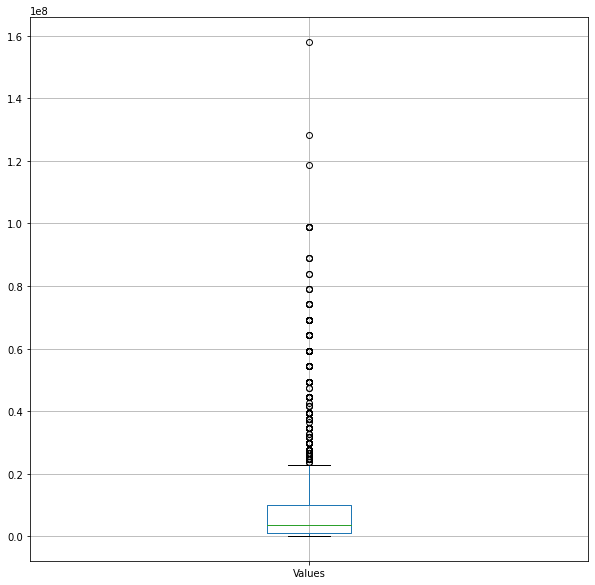

In [ ]:
boxplot = joined_dataframe.boxplot(column=['Values']) 

In [ ]:
maxValue = joined_dataframe['Values'].max()

In [ ]:
joined_dataframe[joined_dataframe['Values'] == maxValue]

short_name  preferred_foot  value_eur        Values       age  height_cm  \
6  K. Mbappé               1  105500000  1.580334e+08  0.192308        0.4   

   weight_kg   overall  potential  wage_eur  ...  defending_standing_tackle  \
6   0.377778  0.931818        1.0  0.285714  ...                   0.313953   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
6                  0.292683               0.125              0.033333   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
6             0.054945                 0.101124              0.045455   

   attacking_work_rate  defensive_work_rate  player_positions_one  
6                  1.0                  0.0                    15  

[1 rows x 58 columns]

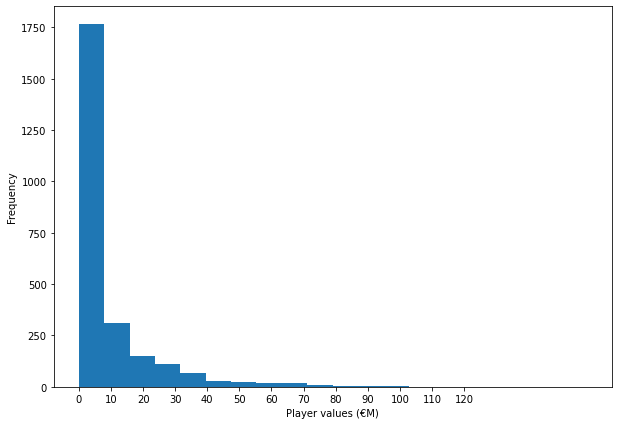

In [ ]:
#Plot frequency of player value ranges in €5 million intervals
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(joined_dataframe['Values']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

# More Cleaning

In [ ]:

goalkeepers = ['GK']
goalkeepers_dataframe = joined_dataframe[joined_dataframe['player_positions_one'] == 1] 

removing_goalkeeping_stats = ["gk_speed"]
outfield_dataframe = joined_dataframe[joined_dataframe['player_positions_one'] != 1]

outfield_dataframe.drop(columns = removing_goalkeeping_stats, inplace=True) 

deletedRows = ["shooting", "pace","passing", "dribbling", "defending", "physic"]

goalkeepers_dataframe.drop(columns = deletedRows, inplace=True) 
print(outfield_dataframe.columns)

playerNameCol = ["short_name"]

copygoalkeepers_dataframe = goalkeepers_dataframe.copy()
copygoalkeepers_dataframe.drop(columns = playerNameCol, inplace=True) 
copyoutfielddf = outfield_dataframe.copy()
copyoutfielddf.drop(columns = playerNameCol, inplace=True) 

Index(['short_name', 'preferred_foot', 'value_eur', 'Values', 'age',
       'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'weak_foot', 'skill_moves', 'release_clause_eur',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_s


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
copyoutfielddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 18607
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   preferred_foot              2220 non-null   int64  
 1   value_eur                   2220 non-null   int64  
 2   Values                      2220 non-null   float64
 3   age                         2220 non-null   float64
 4   height_cm                   2220 non-null   float64
 5   weight_kg                   2220 non-null   float64
 6   overall                     2220 non-null   float64
 7   potential                   2220 non-null   float64
 8   wage_eur                    2220 non-null   float64
 9   weak_foot                   2220 non-null   float64
 10  skill_moves                 2220 non-null   float64
 11  release_clause_eur          2126 non-null   float64
 12  contract_valid_until        2219 non-null   float64
 13  pace                        2220

In [ ]:
copyoutfielddf.drop(['release_clause_eur', 'defending_marking', 'value_eur'], axis = 1, inplace = True) 

In [ ]:
copygoalkeepers_dataframe

preferred_foot  value_eur        Values       age  height_cm  \
2                   1   75000000  6.913960e+07  0.423077      0.650   
7                   1   69500000  5.926251e+07  0.461538      0.625   
9                   1   62500000  5.926251e+07  0.423077      0.725   
12                  0   56000000  5.926251e+07  0.461538      0.925   
16                  1   29000000  1.777875e+07  0.692308      0.775   
...               ...        ...           ...       ...        ...   
18197               1      90000  1.975417e+06  0.115385      0.500   
18354               1      90000  1.975417e+05  0.076923      0.575   
18489               1      50000  1.481563e+05  0.269231      0.575   
18773               0      45000  1.481563e+05  0.192308      0.500   
18848               1      50000  1.481563e+05  0.115385      0.650   

       weight_kg   overall  potential  wage_eur  weak_foot  ...  \
2       0.688889  0.954545   0.947368  0.223214       0.50  ...   
7       0.644444  0.931818   0.947368  0.464286       0.75  ...   
9       0.777778  0.931818   0.894737  0.285714       0.50  ...   
12      0.888889  0.909091   0.868421  0.446429       0.50  ...   
16      0.800000  0.909091   0.842105  0.223214       0.75  ...   
...          ...       ...        ...       ...        ...  ...   
18197   0.422222  0.090909   0.236842  0.001161       0.50  ...   
18354   0.533333  0.068182   0.342105  0.000893       0.50  ...   
18489   0.488889  0.068182   0.052632  0.005357       0.25  ...   
18773   0.555556  0.022727   0.131579  0.001071       0.50  ...   
18848   0.422222  0.000000   0.210526  0.000982       0.00  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.058140                  0.121951   
7                       0.069767                  0.024390   
9                       0.139535                  0.097561   
12                      0.127907                  0.097561   
16                      0.034884                  0.036585   
...                          ...                       ...   
18197                   0.046512                  0.036585   
18354                   0.046512                  0.048780   
18489                   0.046512                  0.060976   
18773                   0.046512                  0.024390   
18848                   0.069767                  0.024390   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.965909              1.000000             0.835165   
7                0.977273              0.922222             0.945055   
9                0.954545              0.955556             0.912088   
12               0.931818              0.966667             0.791209   
16               0.965909              0.944444             0.978022   
...                   ...                   ...                  ...   
18197            0.568182              0.588889             0.516484   
18354            0.590909              0.544444             0.582418   
18489            0.636364              0.522222             0.516484   
18773            0.625000              0.544444             0.483516   
18848            0.545455              0.511111             0.483516   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988764              1.000000                  0.5   
7                     0.966292              1.000000                  0.5   
9                     1.000000              0.988636                  0.5   
12                    0.932584              0.977273                  0.5   
16                    0.943820              0.988636                  0.5   
...                        ...                   ...                  ...   
18197                 0.573034              0.590909                  0.5   
18354                 0.561798              0.625000                  0.5   
18489                 0.505618              0.

In [ ]:
copygoalkeepers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 2 to 18848
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   preferred_foot              289 non-null    int64  
 1   value_eur                   289 non-null    int64  
 2   Values                      289 non-null    float64
 3   age                         289 non-null    float64
 4   height_cm                   289 non-null    float64
 5   weight_kg                   289 non-null    float64
 6   overall                     289 non-null    float64
 7   potential                   289 non-null    float64
 8   wage_eur                    289 non-null    float64
 9   weak_foot                   289 non-null    float64
 10  skill_moves                 289 non-null    float64
 11  release_clause_eur          277 non-null    float64
 12  contract_valid_until        289 non-null    float64
 13  gk_speed                    289 n

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

def EvaluativeMethods(actualVals, predictedVals):
  array = []
  rmse = sqrt(mean_squared_error(actualVals, predictedVals))
  mse = mean_squared_error(actualVals,predictedVals)
  mae = mean_absolute_error(actualVals,predictedVals)
  rSquared = r2_score(actualVals, predictedVals)

  return rmse, mse, mae, rSquared

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
def plotFeatureImportanceAsGraph(listOfFeatures,listOfFeatureImportanceVals, modelType):
  data={'feature_names':listOfFeatures,'feature_importance':listOfFeatureImportanceVals}
  df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=df['feature_importance'], y=df['feature_names'])
  #Add chart labels
  plt.title(modelType + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
'''
FUNCTION: CheckForNaNsInColumn

INPUT: 
dataframe holding all of the information for the football players
column_name = the column that the null values will be checked again

OUTPUT: does not return anything prints the total of null values within a column


'''

def checkForNaNsInColumn(dataframe, column_name):
  print(column_name)
  print(dataframe[column_name].isnull().sum())
  
for column in copygoalkeepers_dataframe.columns:
  checkForNaNsInColumn(copygoalkeepers_dataframe,column)

preferred_foot
0
value_eur
0
Values
0
age
0
height_cm
0
weight_kg
0
overall
0
potential
0
wage_eur
0
weak_foot
0
skill_moves
0
release_clause_eur
12
contract_valid_until
0
gk_speed
0
attacking_crossing
0
attacking_finishing
0
attacking_heading_accuracy
0
attacking_short_passing
0
attacking_volleys
0
skill_dribbling
0
skill_curve
0
skill_fk_accuracy
0
skill_long_passing
0
skill_ball_control
0
movement_acceleration
0
movement_sprint_speed
0
movement_agility
0
movement_reactions
0
movement_balance
0
power_shot_power
0
power_jumping
0
power_stamina
0
power_strength
0
power_long_shots
0
mentality_aggression
0
mentality_interceptions
0
mentality_positioning
0
mentality_vision
0
mentality_penalties
0
mentality_composure
0
defending_marking
289
defending_standing_tackle
0
defending_sliding_tackle
0
goalkeeping_diving
0
goalkeeping_handling
0
goalkeeping_kicking
0
goalkeeping_positioning
0
goalkeeping_reflexes
0
attacking_work_rate
0
defensive_work_rate
0
player_positions_one
0


In [ ]:
for column in copyoutfielddf.columns:
  checkForNaNsInColumn(copyoutfielddf,column)

preferred_foot
0
Values
0
age
0
height_cm
0
weight_kg
0
overall
0
potential
0
wage_eur
0
weak_foot
0
skill_moves
0
contract_valid_until
1
pace
0
shooting
0
passing
0
dribbling
0
defending
0
physic
0
attacking_crossing
0
attacking_finishing
0
attacking_heading_accuracy
0
attacking_short_passing
0
attacking_volleys
0
skill_dribbling
0
skill_curve
0
skill_fk_accuracy
0
skill_long_passing
0
skill_ball_control
0
movement_acceleration
0
movement_sprint_speed
0
movement_agility
0
movement_reactions
0
movement_balance
0
power_shot_power
0
power_jumping
0
power_stamina
0
power_strength
0
power_long_shots
0
mentality_aggression
0
mentality_interceptions
0
mentality_positioning
0
mentality_vision
0
mentality_penalties
0
mentality_composure
0
defending_standing_tackle
0
defending_sliding_tackle
0
goalkeeping_diving
0
goalkeeping_handling
0
goalkeeping_kicking
0
goalkeeping_positioning
0
goalkeeping_reflexes
0
attacking_work_rate
0
defensive_work_rate
0
player_positions_one
0


In [ ]:
copygoalkeepers_dataframe.drop(['release_clause_eur', 'defending_marking', 'value_eur','skill_moves'], axis = 1, inplace = True) 

In [ ]:
copygoalkeepers_dataframe.columns

Index(['preferred_foot', 'Values', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'wage_eur', 'weak_foot', 'contract_valid_until',
       'gk_speed', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
    

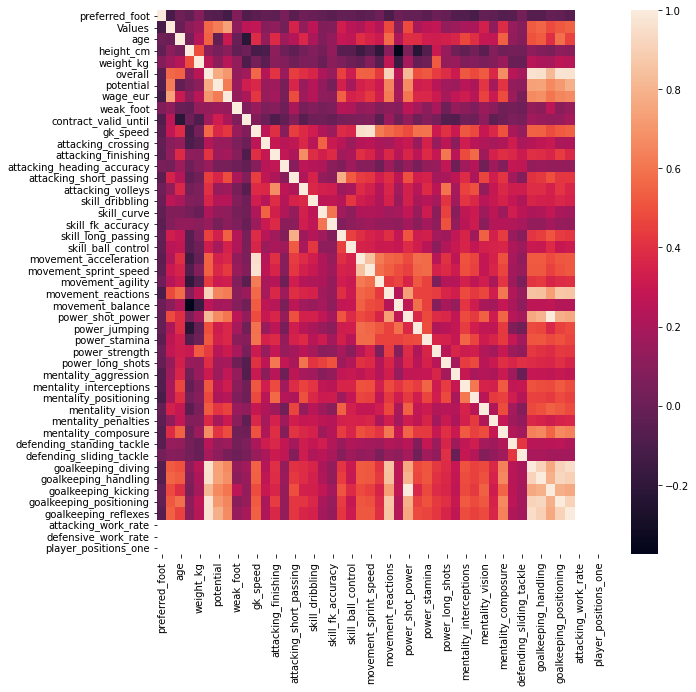

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(copygoalkeepers_dataframe.corr(), annot = False)
plt.show()

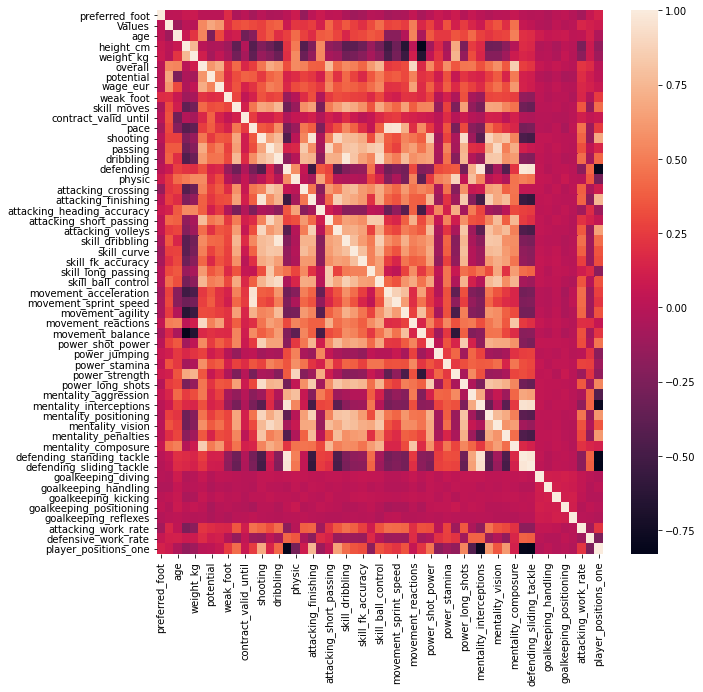

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(copyoutfielddf.corr(), annot = False)
plt.show()

# Run the following models on the transfermarkt data:
**LR**

**KNN**

**Random Forest**

**Decision Tree**

**Linear SVR Model**

**XGBoost**

Linear Regression Goalkeepers


In [ ]:
train , test = train_test_split(copygoalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regrLRGoalie = linear_model.LinearRegression()
regrLRGoalie.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predLRGoalie = regrLRGoalie.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_predLRGoalie)

(5041804.246284421, 25419790057851.617, 3831432.1159323812, 0.5068492746133637)

In [ ]:
r2_score(y_test, y_predLRGoalie)

0.5068492746133637

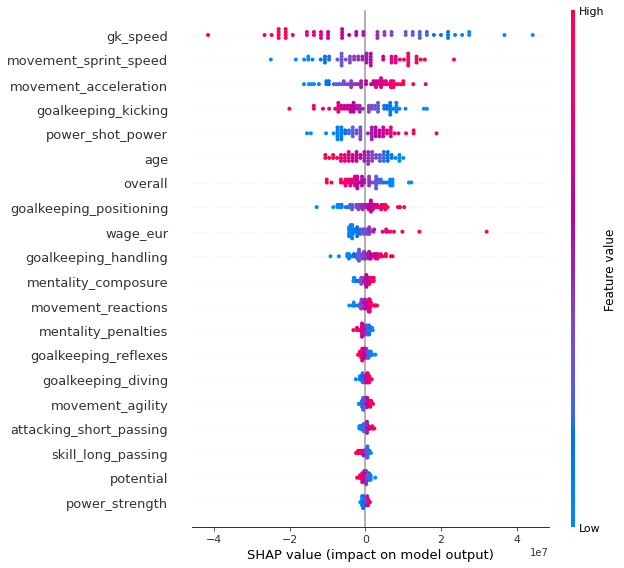

In [ ]:
explainer = shap.LinearExplainer(regrLRGoalie, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

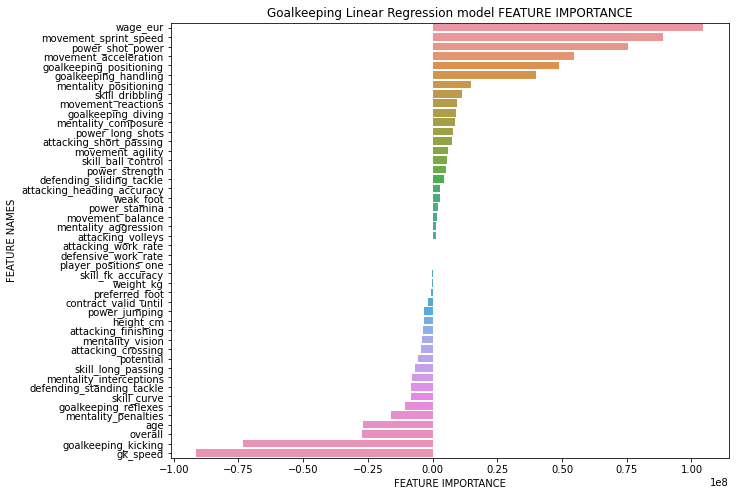

In [ ]:
plotFeatureImportanceAsGraph(regrLRGoalie.feature_names_in_, regrLRGoalie.coef_, "Goalkeeping Linear Regression model")

# XGBoostRegressor

In [ ]:
train , test = train_test_split(copygoalkeepers_dataframe,shuffle = True, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

xgbr = XGBRegressor(n_estimators=1000,learning_rate=0.1)

In [ ]:
xgbr_model = xgbr.fit(x_train, y_train)

[12:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
est = xgbr_model.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,est)

(3146173.3124239193, 9898406511808.496, 2194942.922546383, 0.8083047076978533)

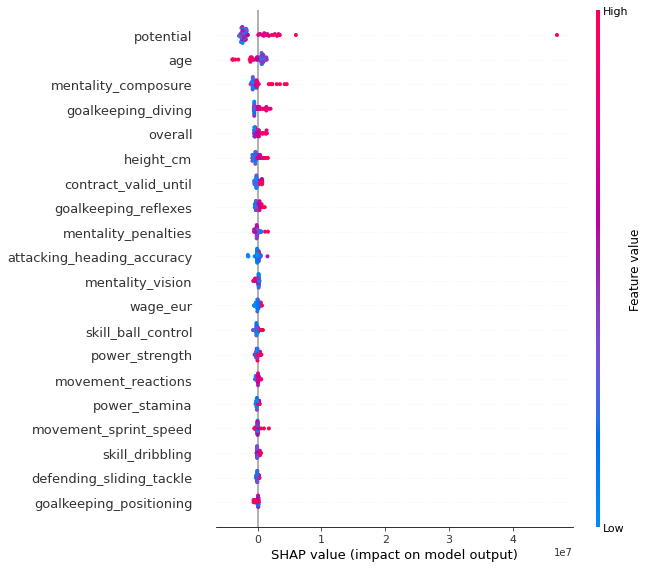

In [ ]:
explainer = shap.TreeExplainer(xgbr_model, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [ ]:
x_train.columns.tolist()

['preferred_foot',
 'age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'wage_eur',
 'weak_foot',
 'contract_valid_until',
 'gk_speed',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'attacking_work_rate',
 'defensive_work_rate',
 'player_positions_one']

In [ ]:
featuresXGbrImportance = xgbr_model.feature_importances_

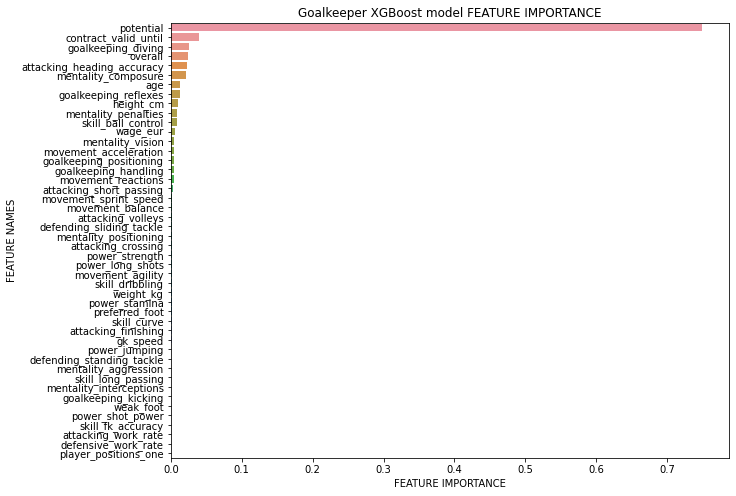

In [ ]:
plotFeatureImportanceAsGraph(x_train.columns.tolist(), featuresXGbrImportance, "Goalkeeper XGBoost model")

Linear Regression Outfield Players


In [ ]:
copyoutfielddf.dropna(subset=['contract_valid_until'],inplace=True)

In [ ]:
copyoutfielddf.columns

Index(['preferred_foot', 'Values', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'wage_eur', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkee

In [ ]:
train , test = train_test_split(copyoutfielddf,shuffle = True, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regrLROutfield = linear_model.LinearRegression()
regrLROutfield.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predLROutfield = regrLROutfield.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_predLROutfield)

(9317196.278141167, 86810146485407.62, 6052605.805522827, 0.5443511648240971)

X axis is in the outcome variable 

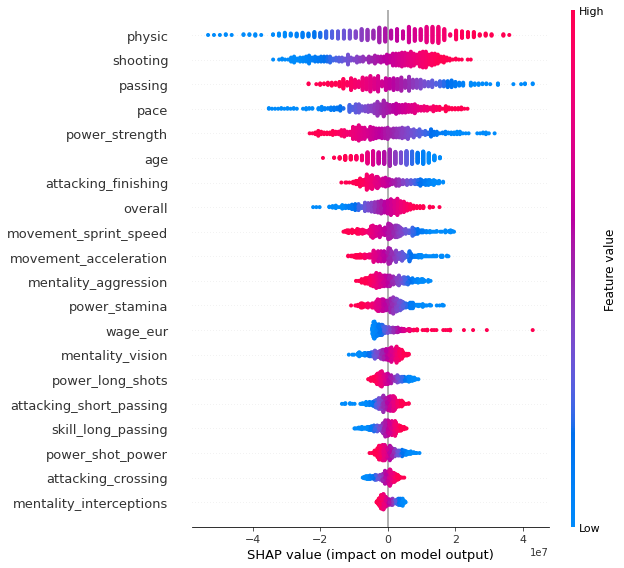

In [ ]:
explainer = shap.LinearExplainer(regrLROutfield, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

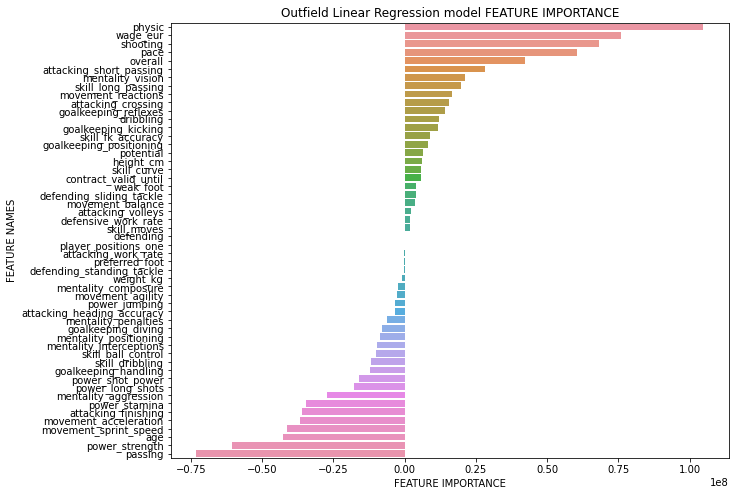

In [ ]:
plotFeatureImportanceAsGraph(regrLROutfield.feature_names_in_, regrLROutfield.coef_, "Outfield Linear Regression model")

XGRegressor

In [ ]:
train , test = train_test_split(copyoutfielddf, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

xgbrOutfield = XGBRegressor(n_estimators=1000,learning_rate=0.1)

In [ ]:
xgbr_modelOutfield = xgbrOutfield.fit(x_train, y_train)

[12:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
estOutfield = xgbr_modelOutfield.predict(x_test)

In [ ]:
features_xgbrImportance = xgbr_modelOutfield.feature_importances_

In [ ]:
x_test.columns.tolist()

['preferred_foot',
 'age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'wage_eur',
 'weak_foot',
 'skill_moves',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',


In [ ]:
EvaluativeMethods(y_test,estOutfield)

(7093753.278581624, 50321335577387.54, 4279278.356442319, 0.7518480644213181)

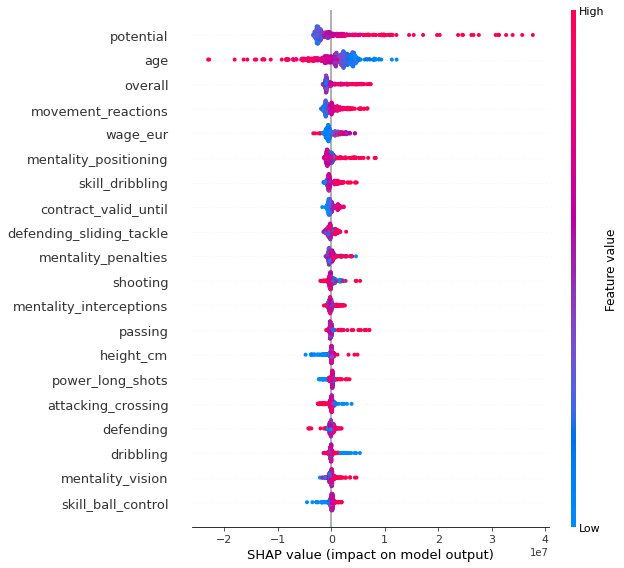

In [ ]:
explainer = shap.TreeExplainer(xgbr_modelOutfield, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

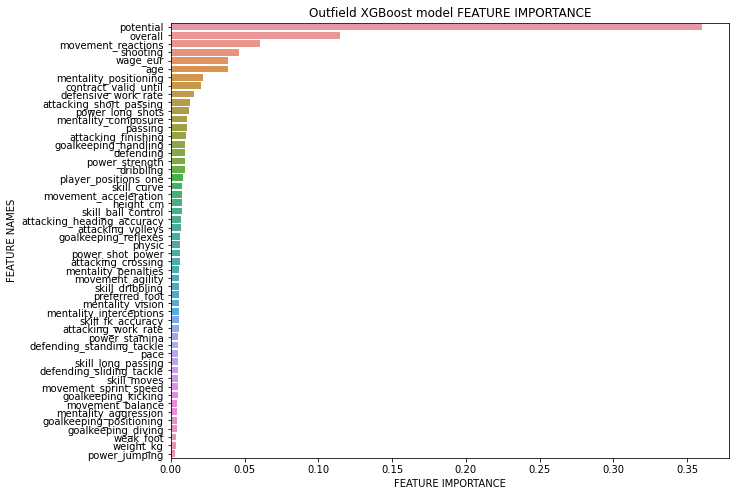

In [ ]:
plotFeatureImportanceAsGraph(x_test.columns.tolist(), features_xgbrImportance, "Outfield XGBoost model")

KNN Outfield Players 

In [ ]:
copyoutfielddf.columns

Index(['preferred_foot', 'Values', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'wage_eur', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkee

In [ ]:
#dataframe with the outcome values

#dataframe with the values not including outcome value


train , test = train_test_split(copyoutfielddf, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']

x_test = test.drop('Values', axis = 1)
y_test = test['Values']

knnOutfield = neighbors.KNeighborsRegressor()

# params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

# model = GridSearchCV(knn, params, cv=5)
knnOutfield.fit(x_train,y_train)
#model.best_params_

KNeighborsRegressor()

In [ ]:
y_predKNNOutfield = knnOutfield.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_predKNNOutfield)

(12377127.539284853, 153193286123723.53, 6936750.073189454, 0.3702895472139711)

In [ ]:
x_test.iloc[10]

preferred_foot                1.000000
age                           0.653846
height_cm                     0.450000
weight_kg                     0.377778
overall                       0.500000
potential                     0.368421
wage_eur                      0.032143
weak_foot                     0.500000
skill_moves                   0.250000
contract_valid_until          0.250000
pace                          0.696970
shooting                      0.207792
passing                       0.312500
dribbling                     0.388060
defending                     0.786667
physic                        0.683333
attacking_crossing            0.563218
attacking_finishing           0.263736
attacking_heading_accuracy    0.682353
attacking_short_passing       0.542169
attacking_volleys             0.383721
skill_dribbling               0.384615
skill_curve                   0.476744
skill_fk_accuracy             0.078652
skill_long_passing            0.353659
skill_ball_control       

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
Using 444 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/444 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha *

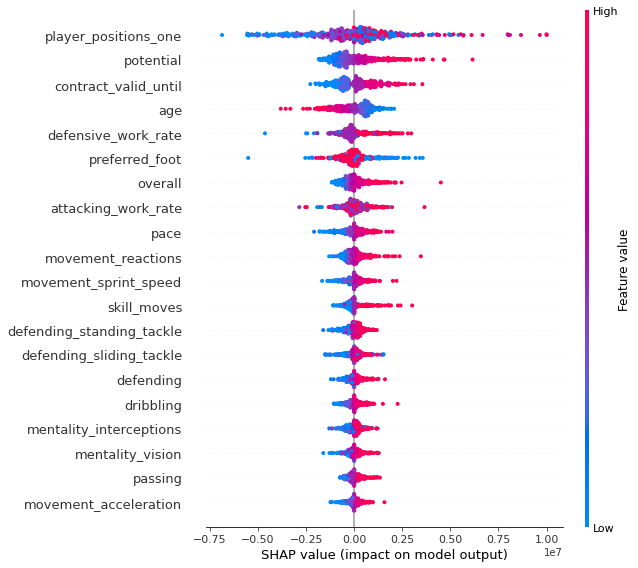

In [ ]:
explainer = shap.KernelExplainer(knnOutfield.predict, x_test)
shap.initjs()
# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

Goalkeeper dataframe using KNN Model

In [ ]:
#dataframe with the outcome values

#dataframe with the values not including outcome value


train , test = train_test_split(copygoalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']

x_test = test.drop('Values', axis = 1)
y_test = test['Values']

knnGoalie = neighbors.KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=5)
knnGoalie = knnGoalie.fit(x_train,y_train)
y_predknnGoalie = knnGoalie.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_predknnGoalie)

(3493985.9986417475,
 12207938158704.568,
 2189310.7989546056,
 0.33077953340292054)

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


  0%|          | 0/58 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The defau

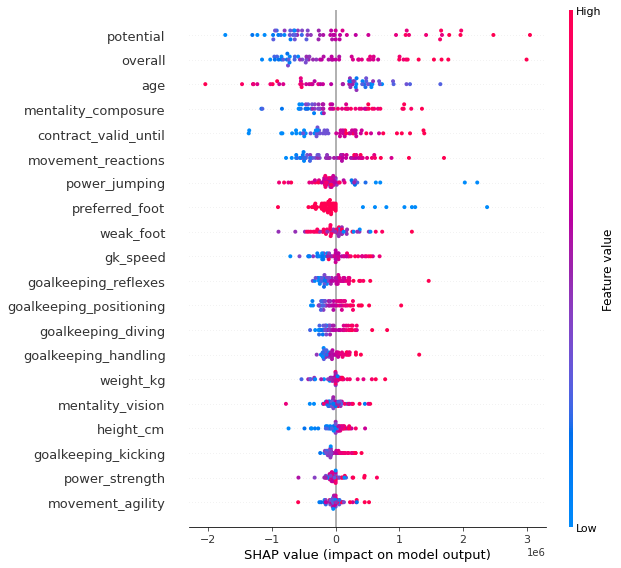

In [ ]:
explainer = shap.KernelExplainer(knnGoalie.predict, x_test)
shap.initjs()
# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

# Random Forest Model

Outfield Players

In [ ]:
train , test = train_test_split(copyoutfielddf, shuffle=True, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regressorRFOutfield = RandomForestRegressor(n_estimators = 20)
regressorRFOutfield.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=20)

In [ ]:
x_test.iloc[[12]]

preferred_foot       age  height_cm  weight_kg   overall  potential  \
7356               1  0.153846        0.4   0.177778  0.409091   0.578947   

      wage_eur  weak_foot  skill_moves  contract_valid_until  ...  \
7356  0.023214        0.5         0.25                 0.375  ...   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
7356                   0.651163                  0.609756            0.068182   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
7356              0.055556             0.087912                  0.11236   

      goalkeeping_reflexes  attacking_work_rate  defensive_work_rate  \
7356              0.079545                  0.5                  0.5   

      player_positions_one  
7356                     8  

[1 rows x 52 columns]

In [ ]:
Y_predregressorRFOutfield = regressorRFOutfield.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,Y_predregressorRFOutfield)

(7737046.882243584, 59861894458035.164, 4008147.3594024247, 0.7138311472054614)

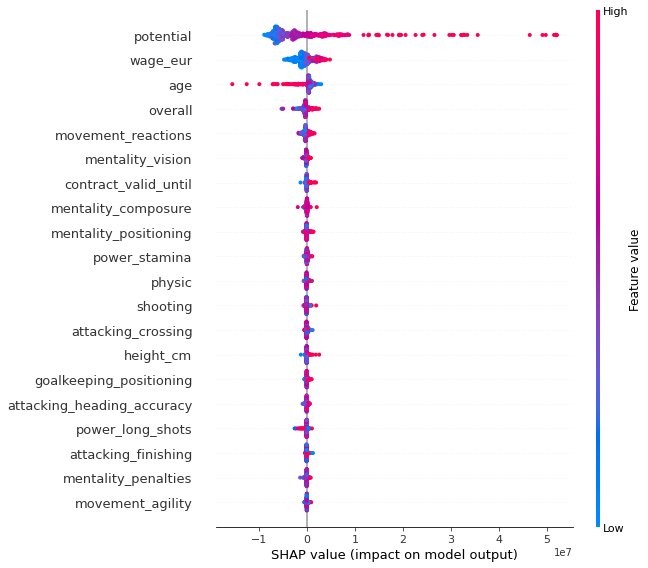

In [ ]:
explainer = shap.TreeExplainer(regressorRFOutfield)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [ ]:
features = x_test.columns.tolist()

In [ ]:
random_forest_feature_importance = regressorRFOutfield.feature_importances_

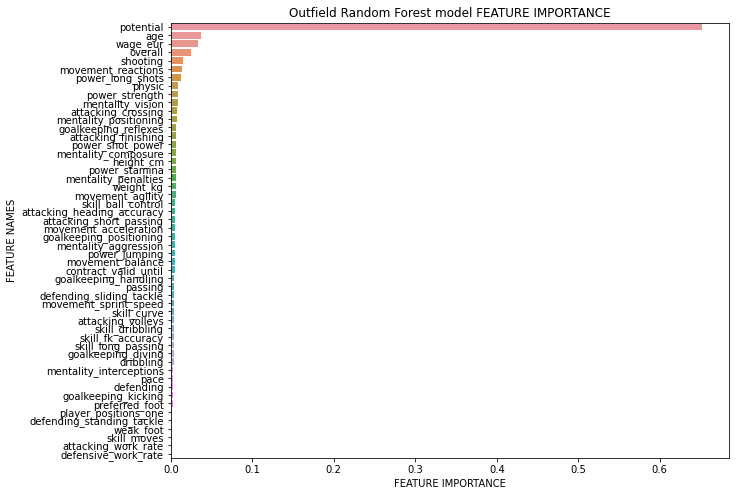

In [ ]:
plotFeatureImportanceAsGraph(features, random_forest_feature_importance, "Outfield Random Forest model")

**Goalkeepers**

In [ ]:
train , test = train_test_split(copygoalkeepers_dataframe,shuffle = True, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regressorRFGoalie = RandomForestRegressor(n_estimators = 100)
regressorRFGoalie.fit(x_train, y_train) 

RandomForestRegressor()

In [ ]:
Y_predregressorRFGoalie = regressorRFGoalie.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,Y_predregressorRFGoalie)

(5169915.307158025, 26728024283186.85, 2527895.7645942075, 0.7713103186595935)

In [ ]:
explainer = shap.TreeExplainer(regressorRFGoalie)

In [ ]:
x_test.iloc[12]

preferred_foot                1.000000
age                           0.807692
height_cm                     0.650000
weight_kg                     0.600000
overall                       0.522727
potential                     0.394737
wage_eur                      0.008929
weak_foot                     0.000000
contract_valid_until          0.125000
gk_speed                      0.204082
attacking_crossing            0.057471
attacking_finishing           0.065934
attacking_heading_accuracy    0.094118
attacking_short_passing       0.012048
attacking_volleys             0.069767
skill_dribbling               0.142857
skill_curve                   0.034884
skill_fk_accuracy             0.112360
skill_long_passing            0.073171
skill_ball_control            0.126437
movement_acceleration         0.144578
movement_sprint_speed         0.148148
movement_agility              0.105263
movement_reactions            0.640625
movement_balance              0.118421
power_shot_power         

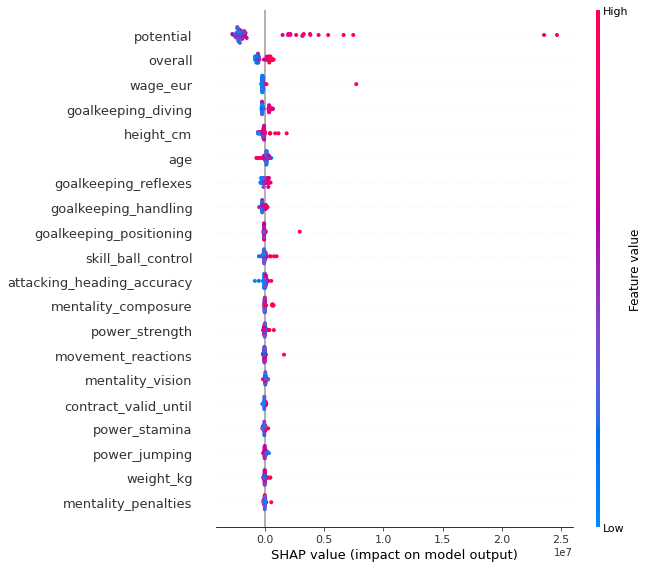

In [ ]:
explainer = shap.TreeExplainer(regressorRFGoalie)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [ ]:
# choosen_instance = x_test.iloc[12]
# shap_values = explainer.shap_values(choosen_instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

In [ ]:
features = x_train.columns

In [ ]:
random_forest_feature_importance = regressorRFGoalie.feature_importances_

In [ ]:
random_forest_feature_importance

array([3.57716356e-04, 6.54402392e-03, 2.52939030e-02, 4.06250262e-03,
       1.43792280e-01, 4.27372487e-01, 1.24188533e-01, 7.39831146e-04,
       2.10900491e-03, 9.59722747e-04, 2.18070367e-03, 2.49839399e-03,
       8.53988373e-03, 5.93770204e-03, 2.00836644e-03, 2.08510293e-03,
       1.30858499e-03, 1.79150414e-03, 1.87527955e-03, 5.75772944e-03,
       3.00281823e-03, 1.97641932e-03, 1.75102352e-03, 3.41357605e-02,
       4.18738867e-03, 7.29840423e-04, 4.11585542e-03, 4.12240122e-03,
       5.08217022e-03, 1.91490793e-03, 2.14778714e-03, 2.57262692e-03,
       2.37926664e-03, 3.80667254e-03, 3.97604554e-03, 8.36794617e-03,
       1.40872099e-03, 1.90907904e-03, 6.19301944e-03, 7.99392032e-02,
       2.06583394e-03, 4.53336006e-02, 9.47835697e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

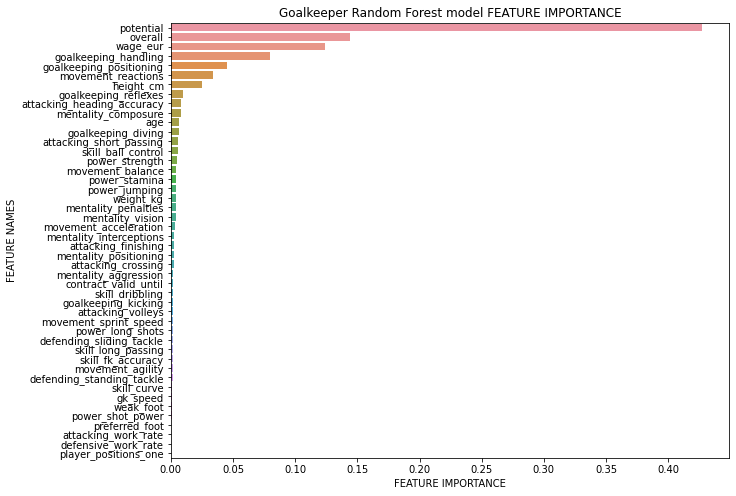

In [ ]:
plotFeatureImportanceAsGraph(features, random_forest_feature_importance, "Goalkeeper Random Forest model")

# Decision Tree Model

Outfield Players

In [ ]:
from sklearn.tree import DecisionTreeRegressor
train , test = train_test_split(copyoutfielddf, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

DTtree_regOutfield = DecisionTreeRegressor()
DTtree_regOutfield.fit(x_train, y_train)
Y_predDTOutfield = DTtree_regOutfield.predict(x_test)

In [ ]:
explainer = shap.TreeExplainer(DTtree_regOutfield)

In [ ]:
x_test.iloc[[13]]

preferred_foot       age  height_cm  weight_kg   overall  potential  \
1074               1  0.538462       0.45   0.355556  0.636364   0.526316   

      wage_eur  weak_foot  skill_moves  contract_valid_until  ...  \
1074  0.051786        0.5          0.5                  0.25  ...   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
1074                   0.767442                  0.768293               0.125   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
1074              0.066667             0.120879                  0.11236   

      goalkeeping_reflexes  attacking_work_rate  defensive_work_rate  \
1074              0.090909                  0.5                  0.5   

      player_positions_one  
1074                     8  

[1 rows x 52 columns]

In [ ]:
EvaluativeMethods(y_test,Y_predDTOutfield)

(9663592.871021958, 93385027176866.42, 5387460.5510012675, 0.4812476941201659)

In [ ]:
DTtree_regOutfield.predict(x_test.iloc[[13]])

array([6420105.355599])

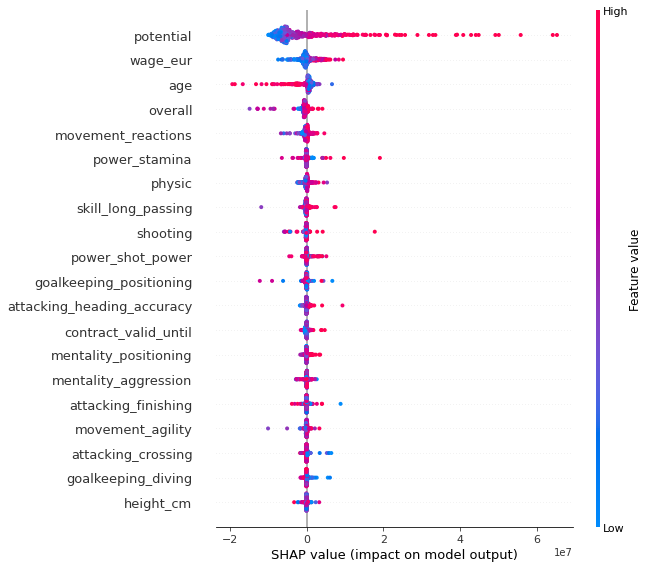

In [ ]:
explainer = shap.TreeExplainer(DTtree_regOutfield)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [ ]:
importance = DTtree_regOutfield.feature_importances_
DTtree_regOutfield.feature_names = (x_train.columns.values)

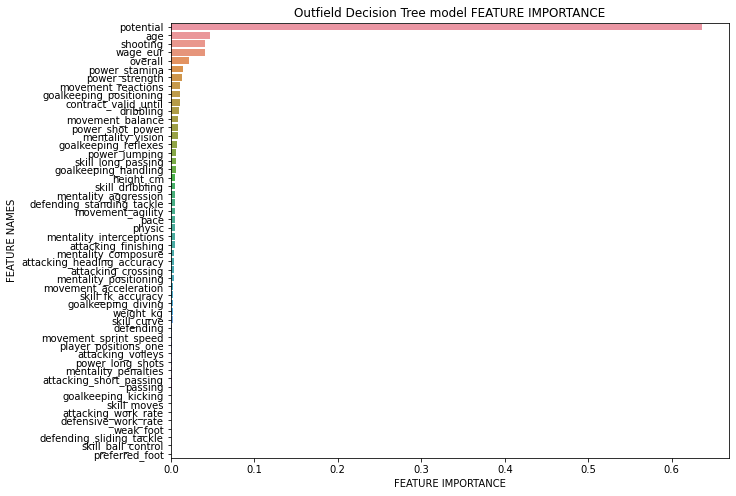

In [ ]:
plotFeatureImportanceAsGraph(DTtree_regOutfield.feature_names, importance, "Outfield Decision Tree model")

Goalkeepers

In [ ]:
from sklearn.tree import DecisionTreeRegressor
train , test = train_test_split(copygoalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

DTtree_regGoalie = DecisionTreeRegressor()
DTtree_regGoalie.fit(x_train, y_train)
y_predGoalDT = DTtree_regGoalie.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_predGoalDT)

(3528261.268083064,
 12448627575855.111,
 1690173.6247830258,
 0.17096350315975695)

In [ ]:
importance = DTtree_regGoalie.feature_importances_
DTtree_regGoalie.feature_names = (x_train.columns.values)

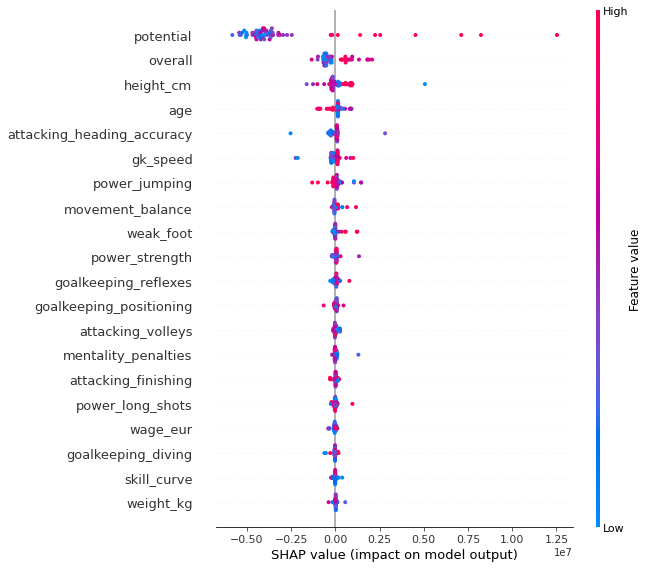

In [ ]:
explainer = shap.TreeExplainer(DTtree_regGoalie)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

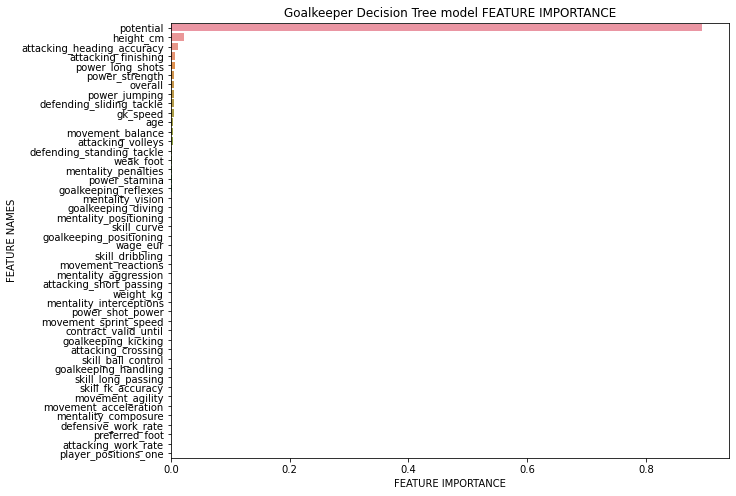

In [ ]:
plotFeatureImportanceAsGraph(DTtree_regGoalie.feature_names, importance, "Goalkeeper Decision Tree model")

# Linear SVR

Outfield Players

In [ ]:
from sklearn import svm
train , test = train_test_split(copyoutfielddf, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regrLRSVROutfield = svm.LinearSVR()
regrLRSVROutfield.fit(x_train, y_train)

Y_predLRSVROutfield = regrLRSVROutfield.predict(x_test)

In [ ]:
importance = regrLRSVROutfield.coef_

In [ ]:
EvaluativeMethods(y_test,Y_predLRSVROutfield)

(17747670.370756697,
 314979803589035.1,
 10192633.329678398,
 -0.49063249399563036)

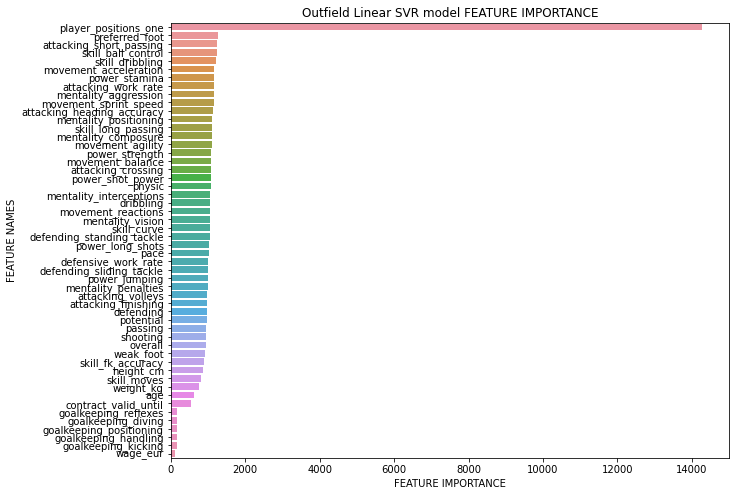

In [ ]:
plotFeatureImportanceAsGraph(regrLRSVROutfield.feature_names_in_, importance, "Outfield Linear SVR model")

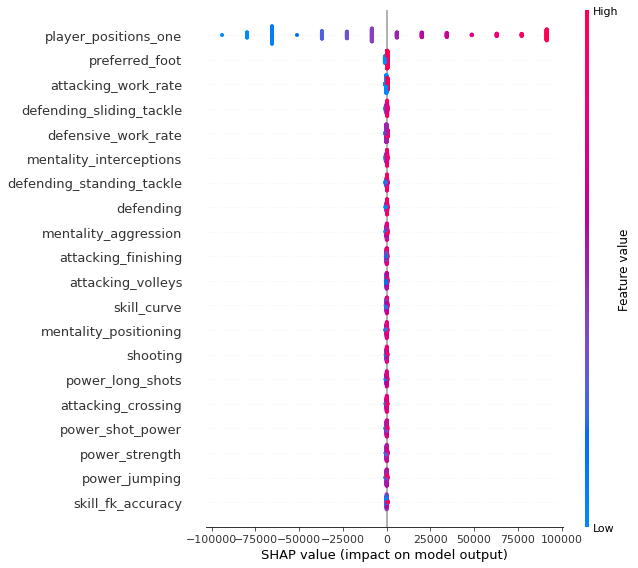

In [ ]:
explainer = shap.LinearExplainer(regrLRSVROutfield, x_test)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Goalkeepers

In [ ]:
from sklearn import svm
train , test = train_test_split(copygoalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('Values', axis=1)
y_train = train['Values']


x_test = test.drop('Values', axis = 1)
y_test = test['Values']

regrLRSVRGoalie = svm.LinearSVR()
regrLRSVRGoalie.fit(x_train, y_train)

Y_predregrLRSVRGoalie = regrLRSVRGoalie.predict(x_test)

In [ ]:
importance = regrLRSVRGoalie.coef_

In [ ]:
EvaluativeMethods(y_test,Y_predregrLRSVRGoalie)

(11922746.61524247, 142151886851275.78, 5425778.396700948, -0.2611567170184612)

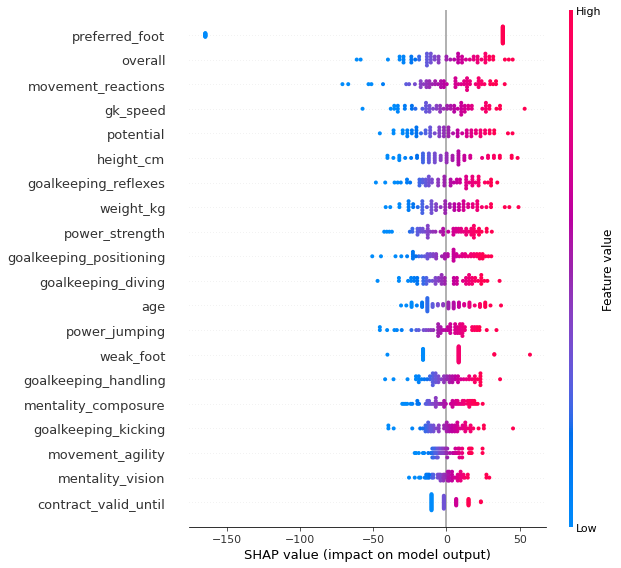

In [ ]:
explainer = shap.LinearExplainer(regrLRSVRGoalie, x_test)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

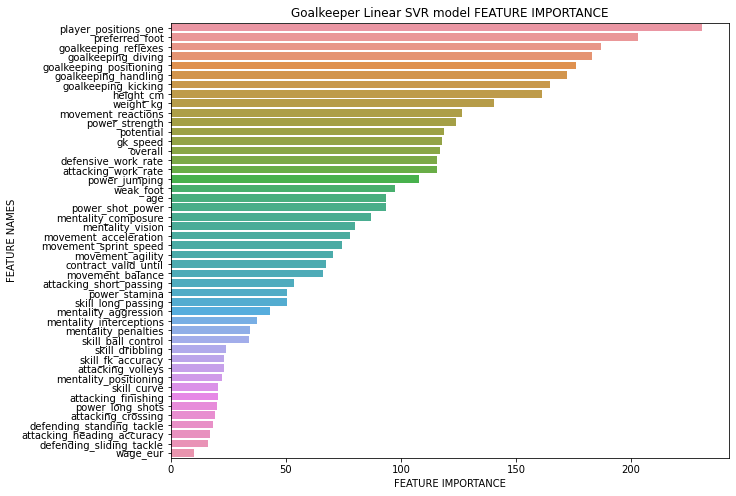

In [ ]:
plotFeatureImportanceAsGraph(regrLRSVRGoalie.feature_names_in_, importance, "Goalkeeper Linear SVR model")